# Suplari Data Science Project

##### Libraries, packages, and dependencies

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
from pandas.plotting import parallel_coordinates
from pandas.plotting import autocorrelation_plot
from pandas.plotting import radviz
from sklearn.linear_model import LinearRegression
from functools import reduce ####
from cycler import cycler ####
  ####
from sklearn.decomposition import PCA  ###
from sklearn.preprocessing import StandardScaler  #####
import matplotlib.dates as mdates ####

sns.set(color_codes=True)
%matplotlib inline
statsmodels.__version__

'0.8.0'

##### Functions

In [2]:
def convertNumToCommaSep(num):
    '''
    Takes a number and converts it to a comma separated 
    string for ease of reading.
    :param num: a number <int/float>
    '''
    try:
        numString = str(int(float(round(num,0))))
    except:
        numString = '0'
    printFriendly,c = '',0
    for s in numString[::-1]:
        c += 1
        if c == 4:
            c = 1
            printFriendly = printFriendly+','+s
        else:
            printFriendly = printFriendly+s
    ###################################
    return ''.join(printFriendly[::-1])

def count_missing(column):
    '''
    returns the number of null items in a column
    :param column: <pandas.Series> 
    '''
    return sum(column.isnull())

def count_unique(column):
    '''
    returns the number of unique items in a column
    :param column: <pandas.Series> 
    '''
    return len(pd.unique(column))

def iterative_sum(lst): 
    '''
    Loops over the list of amounts and keeps a running total, 
    storing the iteratively summed total each pass.
    :param lst: <List> of amounts
    '''
    l = []
    total = 0
    for i in lst:   #reduce()?
        l.append(i+total)
        total+=i
    return l

def quarterly_perc_change(input_lst):
    '''
    Calculates the percent change between total quarterly costs
    :param input_lst: <List> of quarterly sums 
    '''
    output = [0]
    for x in range(1, len(input_lst)):
        y = input_lst[x]
        x = input_lst[int(x-1)]
        if x == 0 and y == 0:
            output.append(0)
        elif x == 0 and y != 0:
            x=1
            output.append((100*((y-x)/x)))
        else:
            output.append((100*((y-x)/x)))
    return output

def sum_by_quarter(quarters, df):
    '''
    Sums total amount by quarter
    :param quarters: <List> if quarters
    :param df: <pandas.DataFrame> with datetime index
    '''
    output = []
    for quarter in quarters:
        if quarter in df.index:
            output.append(sum(df[quarter].amount))
        else:
            output.append(0)
    return output

def average_by_quarter(quarters, df):
    '''
    Computes the quarterly means and returns a list
    :param quarters: <List> of quarters
    :param df: <pandas.DataFrame> with datetime index
    '''
    output = []
    for quarter in quarters:
        output.append(df[quarter].amount.mean())
    return output

def transaction_freq(quarters, df):
    '''
    Returns the number of transactions for each quarter
    :param quarters: <List> of quarters to query
    :param df: <pandas.DataFrame>
    '''
    output = []
    for quarter in quarters:
        output.append(len(df[quarter]))
    return output

def perc_change(x, y):
    '''
    Returns X after a Y% reduction or increase
    :param x: <float> to increase or decrease
    :param y: <float> percentage to change
    '''
    y = y/100
    if y == 0: # zero division
        raise Exception('Division by Zero')
    elif y > 0: # % increase
        return (x*(1+y))
    elif y < 0: # % decrease
        return (x*(1-abs(y)))
        

##### Classes

I could write a class to represent the dataframes and have some of my above functions be methods, but for the scope of this I think I'd be more of an investment than its worth

##### Variables

In [87]:
periods = ['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4']

## Task:

Project for Data Science Candidates

This project is about extracting actionable insights from enterprise transaction data. *Avoid non-specific statements or general observations on the data.*  **We are looking for a detailed result providing information that an enterprise decision maker could act upon to save money, reduce risk or otherwise improve the efficiency of operating their business.**  

    Some examples include:

        ●	Duplicate transactions (can request reimbursement)
        ●	Fragmented categories: categories of spend for which there is no dominant supplier or handful of suppliers (can consolidate many suppliers into few)
        ●	Outlier transactions: transactions that are much larger than the typical transaction amount for a given supplier in a given category (can investigate further)

**Included tables:**
-	Transactions (described below)
-	Normalized vendor name to vendor URL mapping

**Transaction table columns:**
-	transaction_date: year-month-day
-	transaction_id: unique transaction identifier.
-	transaction_type: PCard (i.e., purchase card or corporate card), made by specific employees on a credit card, or AP (i.e., accounts payable), payment on an invoice directly by the company.
-	employee_name: NULL for AP transactions.
-	business_unit_name: the name of the company’s business unit (independent division)
-	Different ways to group transactions:
    -	account_name
    -	cost_center_name
    -	expense_type
    -	category
-	amount: the dollar amount of the transaction (negative for refunds).
-	vendor: the original vendor label that came, e.g., from the credit card company.
-	normalized_vendor: somewhat normalized version of the vendor label.

**Some actionable insights that can be potentially extracted from data:**
-	*The data is mostly but not perfectly clean. What are some ways to clean it up?*
    -	**The normalized vendor name to vendor URL mapping table can be handy for cleaning up the normalized vendor column.**
    -	*Other columns might contain dirty data as well.*
-	*Are there time periods for which data is obviously missing*?
-	Based on vendor usage, can you group some of them, with an eye towards reducing the number of unique vendors per transaction category?
-	Can you predict monthly/weekly spend for the next 6 periods? Your predictions can be by vendor, category, employee name, etc. How precise do you expect your estimates to be?
-	Can you identify “suspicious” transactions, e.g., those where a specific employee spends much more than predicted on a single transaction or over the course of a time period?
-	Anything else you can think of.

We don’t expect you to spend more than 4 hours on this project. In case you do, please include the number of hours worked.

Please include all your artifacts: code, output, findings. A Jupyter notebook would work.  We are looking for documentation of your thought process with detailed description of the operations/transformation you executed and a summary statement of the findings.  



My Approach

1. I want to explore the data 
     - Format unformatted data points
     - Check for consistency and places where the data is missing
     - Look into discrepancies 
     

## Data import and clean up

### IMPORT: techtrades-master-supplier.tsv - df - dict

In [3]:
masterSup = pd.read_csv("C:/Users/Tyler/Desktop/DS-candidates-assignment/techtrades-master-supplier.tsv", sep='\t')
masterSup.head()

,name,website
0,0569/2CA069 SEES CANDY,sees.com
1,"10,000ft",10000ft.com
2,1000bulbs.Com,1000bulbs.com
3,100 EAST HURON,chicagoparking.spplus.com
4,100 N LA CIENEGA BLVD,www.thebeverlyconnection.com


In [4]:
masterSup.describe()

,name,website
count,18445,18445
unique,18445,17745
top,"THE WESTIN GRAND, BERLIN",no website
freq,1,442


In [5]:
masterSup.columns = ['normalized_vendor', 'website']
masterSup.normalized_vendor = [x.upper() for x in masterSup.normalized_vendor]
masterSup.website = [x.upper() for x in masterSup.website]
masterSup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18445 entries, 0 to 18444
Data columns (total 2 columns):
normalized_vendor    18445 non-null object
website              18445 non-null object
dtypes: object(2)
memory usage: 288.3+ KB


This file only contains two columns. The first is a business' name, while the second is the website associated with that name. There are 18445 entries, with repeat values in the websites column.

### IMPORT: techtrades-transactions.tsv - df

#### Import

In [6]:
transactions_by_date = pd.read_csv("C:/Users/Tyler/Desktop/DS-candidates-assignment/techtrades-transactions.tsv", sep='\t', parse_dates=["transaction_date"], index_col="transaction_date")
transactions_by_date.normalized_vendor = [(x.upper()) if type(x) == str else x for x in transactions_by_date.normalized_vendor]
'''
When I did the above operation I was just trying to convert all of the normalized_vendors to uppercase to avoid redundant entries.
However, it tossed an error indicating that there was none string values in the column. 
These strings were rows that had a null value for normalized vendor. I explore null vendors and "No Vendor" later.
'''
#questionable = transactions_by_date.applymap(lambda x: isinstance(x, (float)))
#questionable.loc[questionable.normalized_vendor == True]
transactions_by_date.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor
transaction_date,,,,,,,,,,,
2015-01-01,Pcards.104.5993,pcard,Ahmed Mohamed Al-Merjabi,"Techtrades, Inc. (HQ)",Car Rental & Taxi,General Management,Car Rental,Car Rental & Transportation,269.40,SQ *TAXI AND LIMO S,MEMPHIS INTERNATIONAL AIRPORT
2015-01-01,Pcards.104.167267,pcard,Amina Bakhit,Techtrades LTD (UK),Car Rental & Taxi,Sales,Car Rental,Car Rental & Transportation,46.99,VTS CITY SERVICE TAXI,CITY SERVICE TAXI
2015-01-01,Pcards.104.469827,pcard,Andreas Bube,"Techtrades, Inc. (HQ)",Employee Incentives,Sales,Employee Incentives,Employee Benefits,4.89,LAWSON STATION SW,LAWSON
2015-01-01,Pcards.104.4801,pcard,Andres Chocho,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Operations,Car Rental,Car Rental & Transportation,311.09,SQ *SEATTLE TAXI # 625 GO,SEATTLE YELLOW CAB
2015-01-01,Pcards.104.8168,pcard,Araujo Luiz Alberto De,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Marketing,Car Rental,Car Rental & Transportation,218.50,CHI TAXI 5724,O'HARE TAXI AND LIMOUSINE


In [532]:
## Data is in order of earliest date to latest. 
transactions_by_date.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor
transaction_date,,,,,,,,,,,
2015-01-01,Pcards.104.5993,pcard,Ahmed Mohamed Al-Merjabi,"Techtrades, Inc. (HQ)",Car Rental & Taxi,General Management,Car Rental,Car Rental & Transportation,269.40,SQ *TAXI AND LIMO S,MEMPHIS INTERNATIONAL AIRPORT
2015-01-01,Pcards.104.167267,pcard,Amina Bakhit,Techtrades LTD (UK),Car Rental & Taxi,Sales,Car Rental,Car Rental & Transportation,46.99,VTS CITY SERVICE TAXI,CITY SERVICE TAXI
2015-01-01,Pcards.104.469827,pcard,Andreas Bube,"Techtrades, Inc. (HQ)",Employee Incentives,Sales,Employee Incentives,Employee Benefits,4.89,LAWSON STATION SW,LAWSON
2015-01-01,Pcards.104.4801,pcard,Andres Chocho,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Operations,Car Rental,Car Rental & Transportation,311.09,SQ *SEATTLE TAXI # 625 GO,SEATTLE YELLOW CAB
2015-01-01,Pcards.104.8168,pcard,Araujo Luiz Alberto De,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Marketing,Car Rental,Car Rental & Transportation,218.50,CHI TAXI 5724,O'HARE TAXI AND LIMOUSINE


#### Descriptions

In [8]:
transactions_by_date.describe()

,amount
count,8.555300e+05
mean,6.341514e+02
std,1.675086e+04
min,-5.714417e+05
25%,5.570000e+00
50%,1.724000e+01
75%,7.261000e+01
max,3.584990e+06


In [9]:
transactions_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855530 entries, 2015-01-01 to 2018-02-26
Data columns (total 11 columns):
transaction_id        855530 non-null object
transaction_type      855530 non-null object
employee_name         621983 non-null object
business_unit_name    855530 non-null object
account_name          855530 non-null object
cost_center_name      855530 non-null object
expense_type          855530 non-null object
category              855530 non-null object
amount                855530 non-null float64
vendor                855528 non-null object
normalized_vendor     855528 non-null object
dtypes: float64(1), object(10)
memory usage: 78.3+ MB


In [10]:
start = transactions_by_date.index[0]
end = transactions_by_date.index[(len(transactions_by_date)-1)]
print('Data starts on: '+str(start)) 
print('Data ends on: '+str(end))

Data starts on: 2015-01-01 00:00:00
Data ends on: 2018-02-26 00:00:00


Transactional data from Jan 1, 2015 to Feb 26, 2018

In [11]:
print('Number of unique items by column')
print(transactions_by_date.apply(count_unique, axis=0))

Number of unique items by column
transaction_id        855530
transaction_type           2
employee_name           1230
business_unit_name         4
account_name              43
cost_center_name          11
expense_type              84
category                  25
amount                 81916
vendor                103598
normalized_vendor      18170
dtype: int64


In [12]:
print('Number of missing values by column')
print(transactions_by_date.apply(count_missing, axis=0))

Number of missing values by column
transaction_id             0
transaction_type           0
employee_name         233547
business_unit_name         0
account_name               0
cost_center_name           0
expense_type               0
category                   0
amount                     0
vendor                     2
normalized_vendor          2
dtype: int64


**Notes to self:** 

- There are a lot of nulls for employee names. This is due to accounts payable transactions not having an employee name associated with it.

- The two nulls under vendor and normalized vendor should be looked at (Table of Contents Reference)

- The data is 12 columns 
    - 11 categorical variables
    - 1 continuous
- This is ordinal data

### Merge Tables on normalized_vendor

In [13]:
transactions_by_date.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor
transaction_date,,,,,,,,,,,
2015-01-01,Pcards.104.5993,pcard,Ahmed Mohamed Al-Merjabi,"Techtrades, Inc. (HQ)",Car Rental & Taxi,General Management,Car Rental,Car Rental & Transportation,269.40,SQ *TAXI AND LIMO S,MEMPHIS INTERNATIONAL AIRPORT
2015-01-01,Pcards.104.167267,pcard,Amina Bakhit,Techtrades LTD (UK),Car Rental & Taxi,Sales,Car Rental,Car Rental & Transportation,46.99,VTS CITY SERVICE TAXI,CITY SERVICE TAXI
2015-01-01,Pcards.104.469827,pcard,Andreas Bube,"Techtrades, Inc. (HQ)",Employee Incentives,Sales,Employee Incentives,Employee Benefits,4.89,LAWSON STATION SW,LAWSON
2015-01-01,Pcards.104.4801,pcard,Andres Chocho,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Operations,Car Rental,Car Rental & Transportation,311.09,SQ *SEATTLE TAXI # 625 GO,SEATTLE YELLOW CAB
2015-01-01,Pcards.104.8168,pcard,Araujo Luiz Alberto De,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Marketing,Car Rental,Car Rental & Transportation,218.50,CHI TAXI 5724,O'HARE TAXI AND LIMOUSINE


In [14]:
masterSup.head()

,normalized_vendor,website
0,0569/2CA069 SEES CANDY,SEES.COM
1,"10,000FT",10000FT.COM
2,1000BULBS.COM,1000BULBS.COM
3,100 EAST HURON,CHICAGOPARKING.SPPLUS.COM
4,100 N LA CIENEGA BLVD,WWW.THEBEVERLYCONNECTION.COM


#### Merge Transactions and Master Supply on Normalized Vendor

In [15]:
transactions_complete = pd.merge(transactions_by_date.reset_index(), masterSup, how='left', on=['normalized_vendor']).set_index('transaction_date')
print(len(transactions_complete))
transactions_complete.head()

855530


,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015-01-01,Pcards.104.5993,pcard,Ahmed Mohamed Al-Merjabi,"Techtrades, Inc. (HQ)",Car Rental & Taxi,General Management,Car Rental,Car Rental & Transportation,269.40,SQ *TAXI AND LIMO S,MEMPHIS INTERNATIONAL AIRPORT,NaN
2015-01-01,Pcards.104.167267,pcard,Amina Bakhit,Techtrades LTD (UK),Car Rental & Taxi,Sales,Car Rental,Car Rental & Transportation,46.99,VTS CITY SERVICE TAXI,CITY SERVICE TAXI,NaN
2015-01-01,Pcards.104.469827,pcard,Andreas Bube,"Techtrades, Inc. (HQ)",Employee Incentives,Sales,Employee Incentives,Employee Benefits,4.89,LAWSON STATION SW,LAWSON,NaN
2015-01-01,Pcards.104.4801,pcard,Andres Chocho,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Operations,Car Rental,Car Rental & Transportation,311.09,SQ *SEATTLE TAXI # 625 GO,SEATTLE YELLOW CAB,SEATTLEYELLOWCAB.COM
2015-01-01,Pcards.104.8168,pcard,Araujo Luiz Alberto De,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Marketing,Car Rental,Car Rental & Transportation,218.50,CHI TAXI 5724,O'HARE TAXI AND LIMOUSINE,NaN


In [16]:
transactions_complete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855530 entries, 2015-01-01 to 2018-02-26
Data columns (total 12 columns):
transaction_id        855530 non-null object
transaction_type      855530 non-null object
employee_name         621983 non-null object
business_unit_name    855530 non-null object
account_name          855530 non-null object
cost_center_name      855530 non-null object
expense_type          855530 non-null object
category              855530 non-null object
amount                855530 non-null float64
vendor                855528 non-null object
normalized_vendor     855528 non-null object
website               540613 non-null object
dtypes: float64(1), object(11)
memory usage: 84.9+ MB


#### Website Column Clean Up

I noticed that some of the vendor names were websites, so I looked for key words associated with websites in the vendor column so I could clean up the website column a bit. 

In [17]:
websites = transactions_complete.loc[transactions_complete['website'].isna() == True] # pulls all rows with no website
websites = websites.loc[websites['vendor'].isna() == False]

In [18]:
websites = websites.loc[(websites['vendor'].str.contains('.com') == True)] # if vendor str contains .com
print('The number of websites being added to the colums is: {}'.format(len(websites)))
websites['website'] = websites['vendor'] # fills empty website column with vendor if .com was present
cols = list(websites.columns) 
transactions_complete.loc[transactions_complete.transaction_id.isin(websites.transaction_id), cols] = websites[cols]
# Adds lines back to original dataframe
transactions_complete.info()

The number of websites being added to the colums is: 1328
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855530 entries, 2015-01-01 to 2018-02-26
Data columns (total 12 columns):
transaction_id        855530 non-null object
transaction_type      855530 non-null object
employee_name         621983 non-null object
business_unit_name    855530 non-null object
account_name          855530 non-null object
cost_center_name      855530 non-null object
expense_type          855530 non-null object
category              855530 non-null object
amount                855530 non-null float64
vendor                855528 non-null object
normalized_vendor     855528 non-null object
website               541941 non-null object
dtypes: float64(1), object(11)
memory usage: 104.9+ MB


In [19]:
websites = transactions_complete.loc[transactions_complete['website'].isna() == True] # pulls all rows with no website
websites = websites.loc[websites['vendor'].isna() == False]
websites = websites.loc[(websites['vendor'].str.contains('www.') == True)] # if vendor str contains www.
print('The number of websites being added to the colums is: {}'.format(len(websites)))
websites['website'] = websites['vendor'] # fills empty website column with vendor if .com was present
cols = list(websites.columns) 
transactions_complete.loc[transactions_complete.transaction_id.isin(websites.transaction_id), cols] = websites[cols]
## Adds lines back to original dataframe
transactions_complete.info()

The number of websites being added to the colums is: 6
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855530 entries, 2015-01-01 to 2018-02-26
Data columns (total 12 columns):
transaction_id        855530 non-null object
transaction_type      855530 non-null object
employee_name         621983 non-null object
business_unit_name    855530 non-null object
account_name          855530 non-null object
cost_center_name      855530 non-null object
expense_type          855530 non-null object
category              855530 non-null object
amount                855530 non-null float64
vendor                855528 non-null object
normalized_vendor     855528 non-null object
website               541947 non-null object
dtypes: float64(1), object(11)
memory usage: 104.9+ MB


I was able to add the websites to 541,947 entries. 

The nulls in the vendor and normalized vendor columns should be looked at. I can't think of a reason a transaction would not have an associated vendor.

## Preliminary data profiling

This block of code is my initial profile of the data. Where I start to look for relationships within the data. This helps me get acquainted with the data I'm working with as well as providing preliminary insights that I can follow up on later.


Transaction table columns:
    - transaction_date: year-month-day <datetime64[ns]>
    - transaction_id: unique transaction identifier.
    - transaction_type: PCard (purchase card), made by specific employees on a credit card, or AP (i.e., accounts payable)
    - employee_name: NULL for AP transactions.
    - business_unit_name: the name of the company’s business unit (independent division)
    - Different ways to group transactions:
        - account_name
        - cost_center_name
        - expense_type
        - category
    - amount: the dollar amount of the transaction (negative for refunds). <float>
    - vendor: the original vendor label that came, e.g., from the credit card company.
    - normalized_vendor: somewhat normalized version of the vendor label.

### Cost by Date

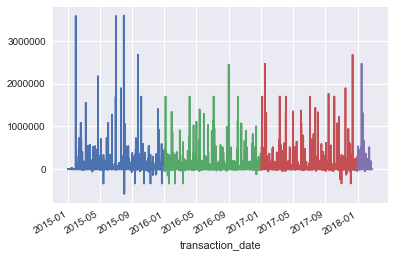

In [21]:
transactions_complete["2015"].amount.plot()
transactions_complete["2016"].amount.plot()
transactions_complete["2017"].amount.plot()
transactions_complete["2018"].amount.plot()

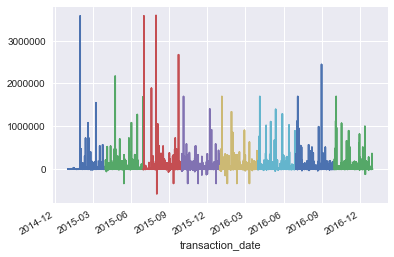

In [22]:
transactions_complete["2015-1":"2015-3"].amount.plot()
transactions_complete["2015-4":"2015-6"].amount.plot()
transactions_complete["2015-7":"2015-9"].amount.plot()
transactions_complete["2015-10":"2015-12"].amount.plot()
transactions_complete["2016-1":"2016-3"].amount.plot()
transactions_complete["2016-4":"2016-6"].amount.plot()
transactions_complete["2016-7":"2016-9"].amount.plot()
transactions_complete["2016-10":"2016-12"].amount.plot()

### By category

In [30]:
categories = list(transactions_complete['category'].unique())  # creates a list of unique category values
print('The number of unique purchasing categories is: {}'.format(len(categories)))
print(categories)

The number of unique purchasing categories is: 25
['Car Rental & Transportation', 'Employee Benefits', 'Software as a Service', 'Office Equipment Rental', 'Meals and Entertainment', 'Office Supplies', 'Training, Tuition, and Seminars', 'Legal Services and Fees', 'Advertising - Media, Agency, Production', 'Storage Hardware / Peripherals', 'Building Repairs Maintenance - Materials', 'Hotels', 'Airfare', 'Telecom / Internet / Data', 'Other Operations Labor, Materials', 'Property Taxes', 'Bank Fees', 'Trade Shows, Conferences, Events', 'Professional Services', 'Freight and Postage', 'IT Consulting', 'Furniture and Fixtures', 'Security Services', 'PCs and Laptops', 'Networking Hardware / Peripherals']


In [31]:
categories_df_list = [[] for i in categories]
for i in range(len(categories)): # iteratively creates a list of dataframes for each category of expense
    new_df = transactions_complete[transactions_complete['category'].str.match(categories[i])]
    categories_df_list[i] = new_df

#### By category dataframe info

In [32]:
categ_df = [list(a) for a in zip(categories, categories_df_list)]
for i in categ_df: # prints info for each dataframe in the list
    print(i[0])
    print(i[1].info())

Car Rental & Transportation
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84586 entries, 2015-01-01 to 2018-02-21
Data columns (total 12 columns):
transaction_id        84586 non-null object
transaction_type      84586 non-null object
employee_name         81705 non-null object
business_unit_name    84586 non-null object
account_name          84586 non-null object
cost_center_name      84586 non-null object
expense_type          84586 non-null object
category              84586 non-null object
amount                84586 non-null float64
vendor                84586 non-null object
normalized_vendor     84586 non-null object
website               70654 non-null object
dtypes: float64(1), object(11)
memory usage: 8.4+ MB
None
Employee Benefits
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1585 entries, 2015-01-01 to 2018-02-21
Data columns (total 12 columns):
transaction_id        1585 non-null object
transaction_type      1585 non-null object
employee_name         1479 non

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6178 entries, 2015-01-08 to 2018-02-21
Data columns (total 12 columns):
transaction_id        6178 non-null object
transaction_type      6178 non-null object
employee_name         1325 non-null object
business_unit_name    6178 non-null object
account_name          6178 non-null object
cost_center_name      6178 non-null object
expense_type          6178 non-null object
category              6178 non-null object
amount                6178 non-null float64
vendor                6178 non-null object
normalized_vendor     6178 non-null object
website               1469 non-null object
dtypes: float64(1), object(11)
memory usage: 627.5+ KB
None
Professional Services
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6184 entries, 2015-01-09 to 2018-02-21
Data columns (total 12 columns):
transaction_id        6184 non-null object
transaction_type      6184 non-null object
employee_name         2859 non-null object
business_unit_name    

In [33]:
total_len = 0
for i in categ_df:  ## Sanity check: All data accounted for 
    total_len += len(i[1])
if total_len == len(transactions_complete):  # Checks if total length of subset dataframes == length of starting dataframe
    print(True) # ensures I still have all the data I expect to have
else:
    print('Missing rows')

True


#### By category amount by date

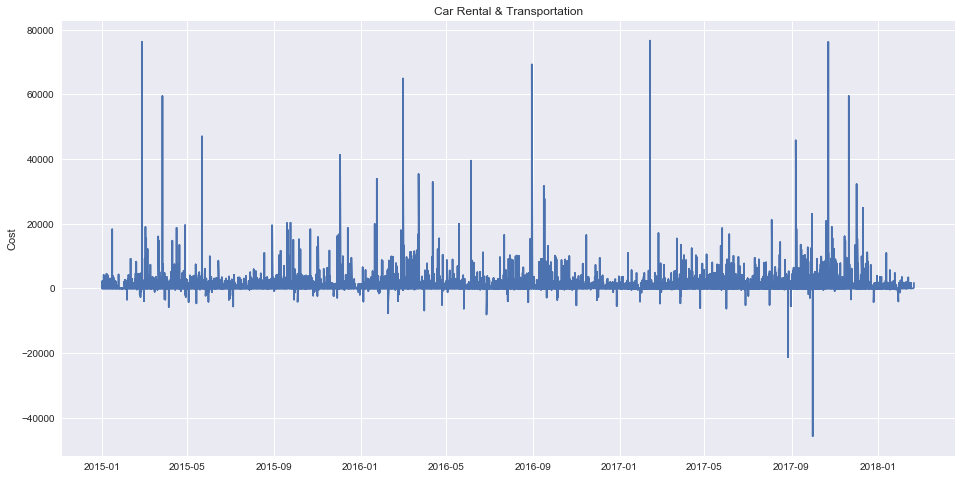

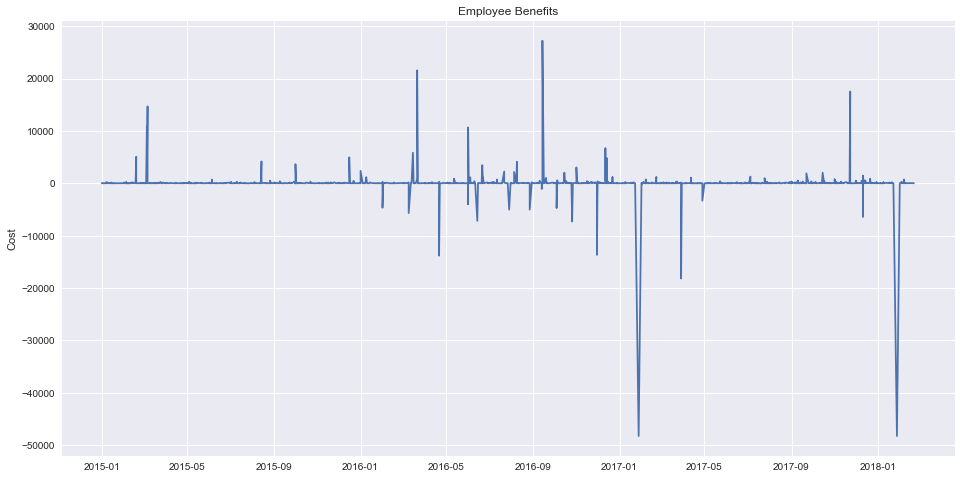

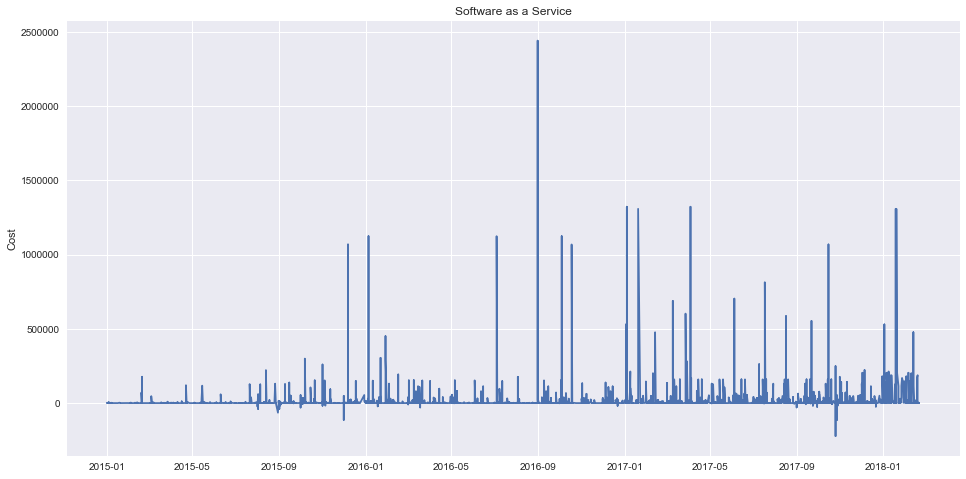

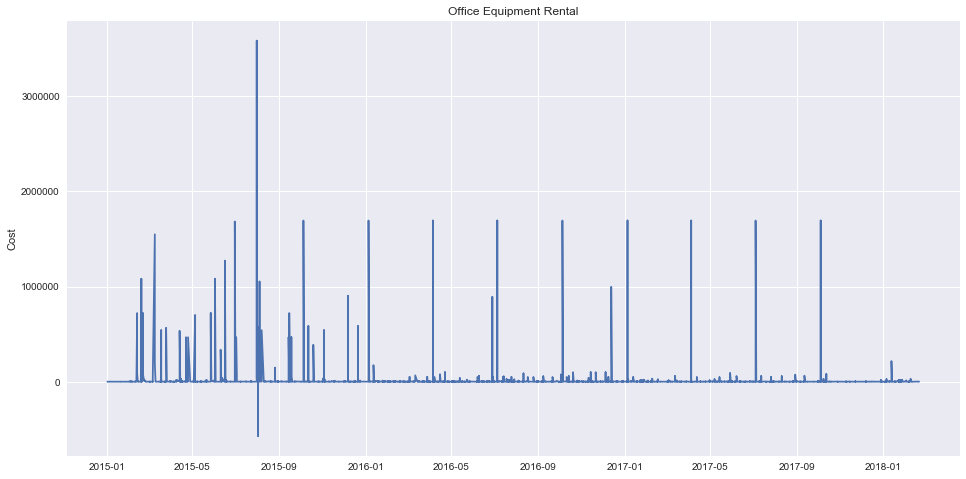

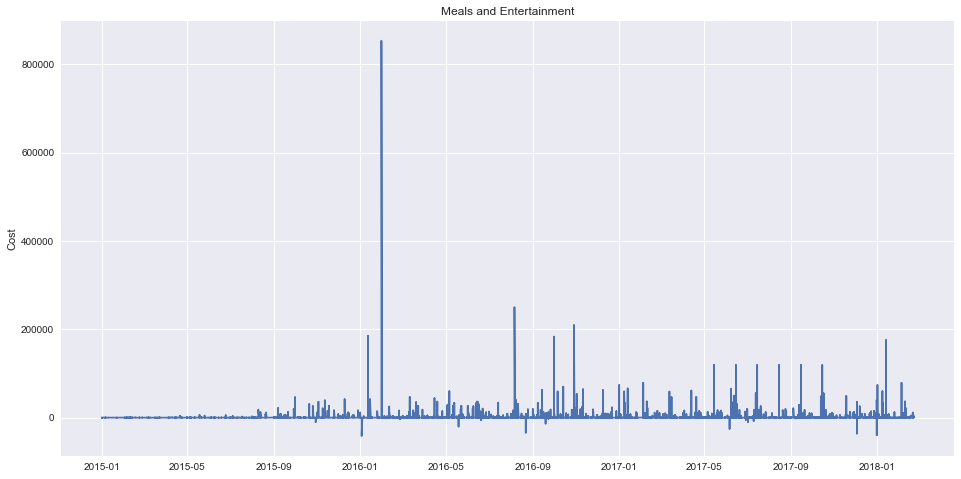

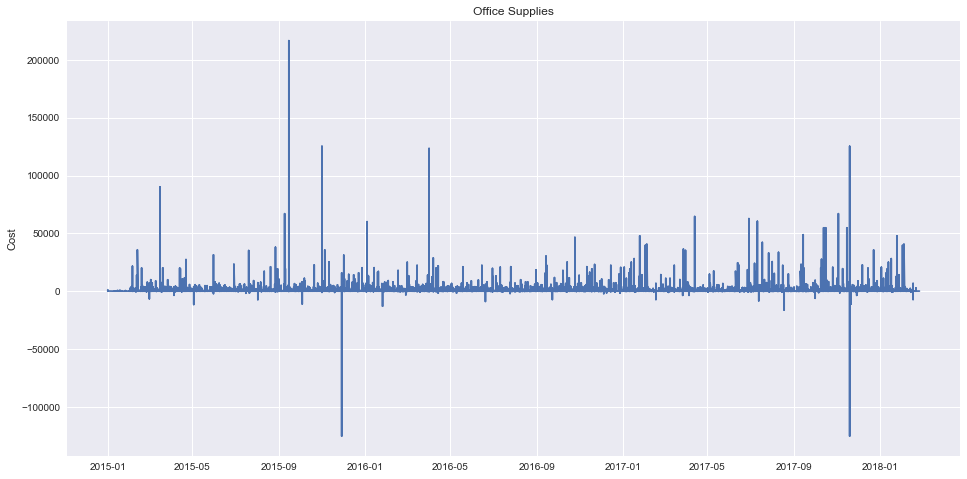

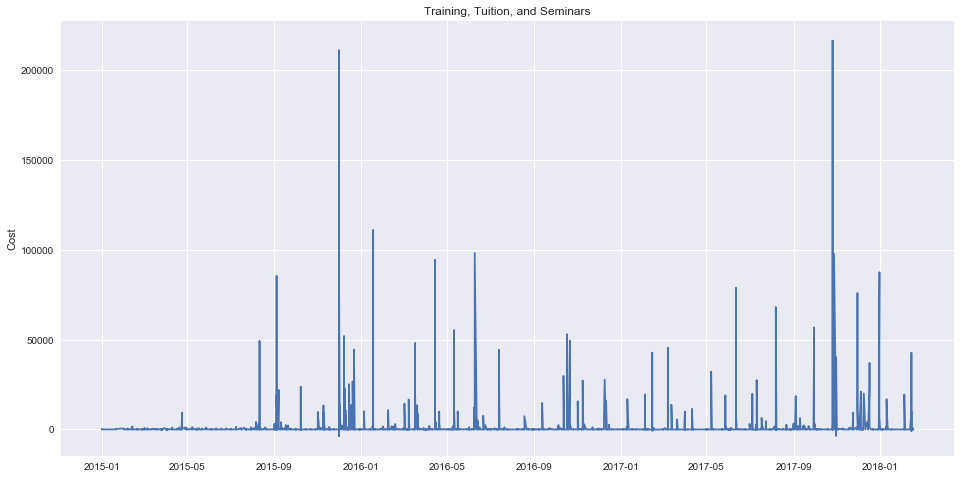

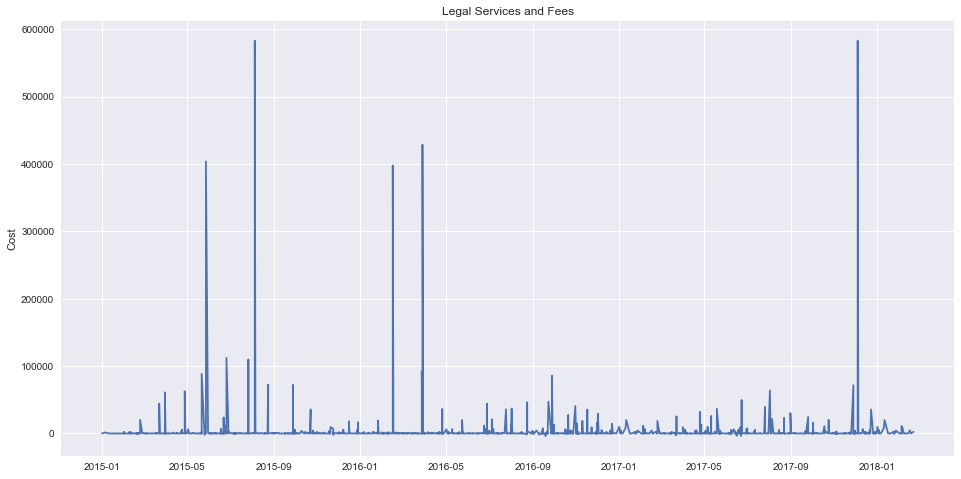

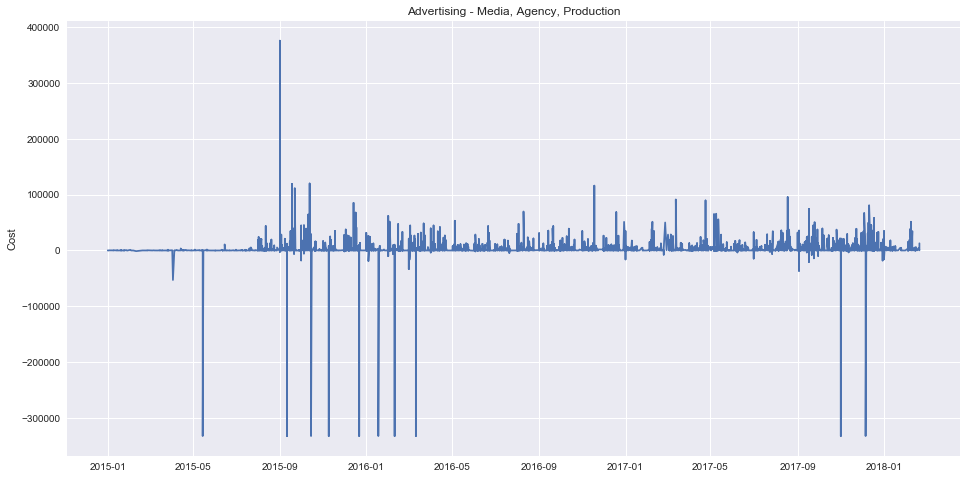

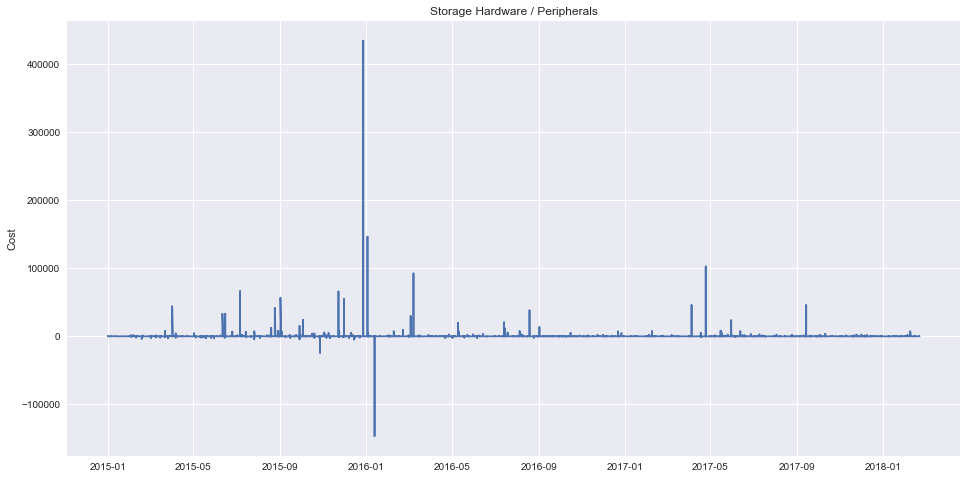

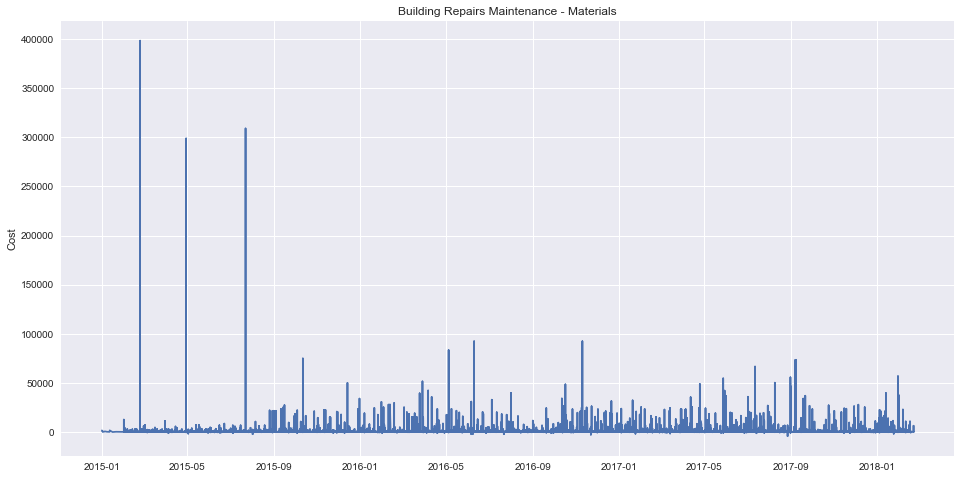

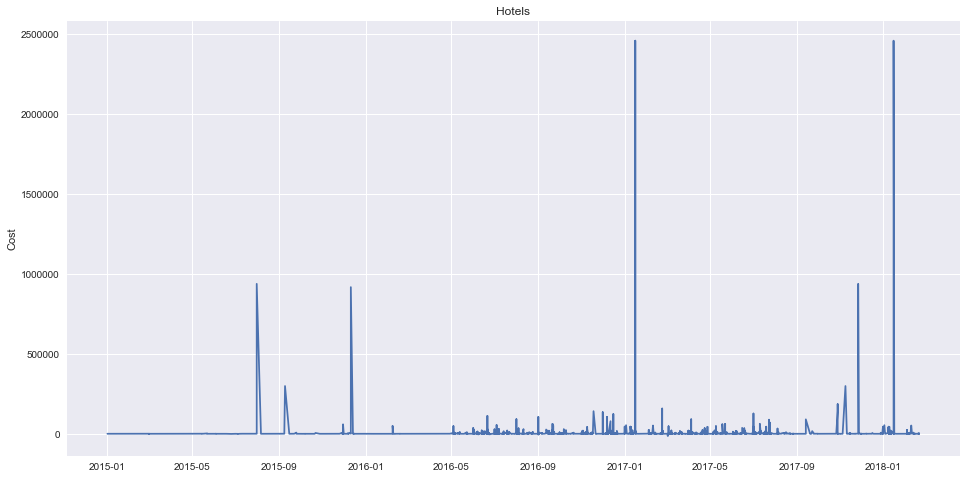

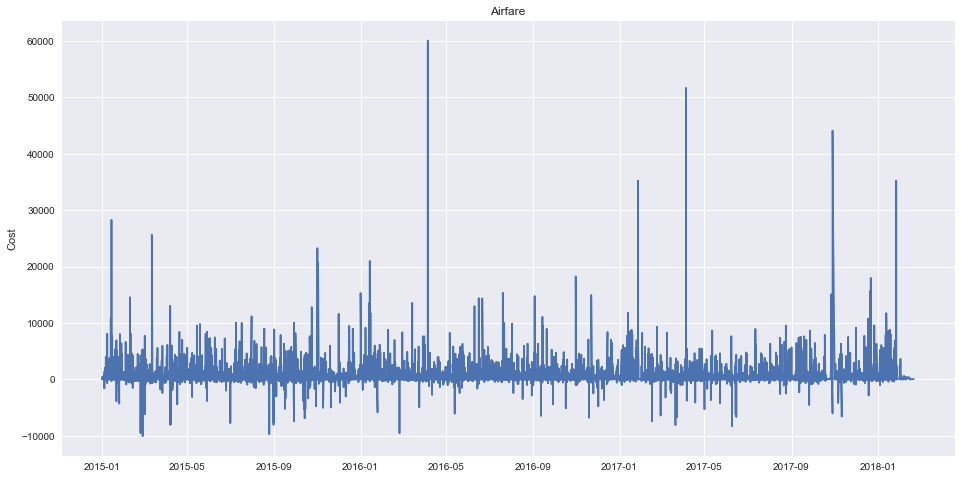

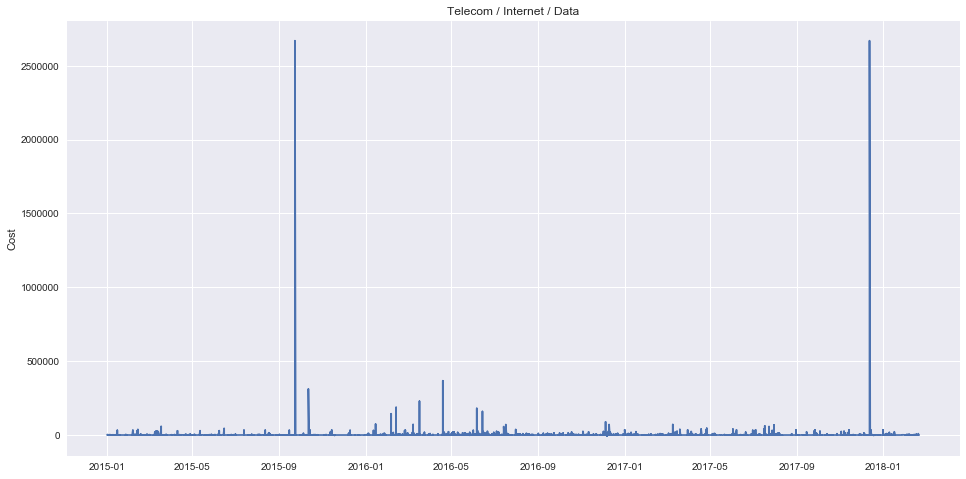

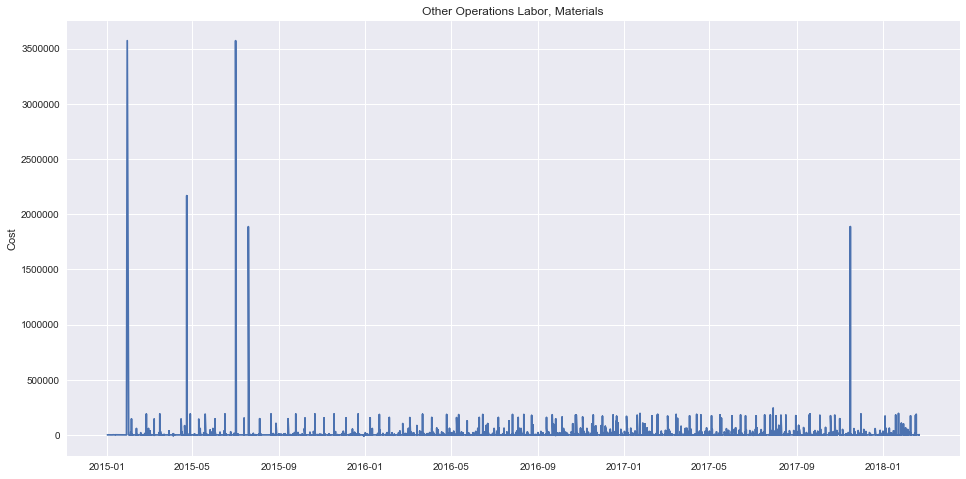

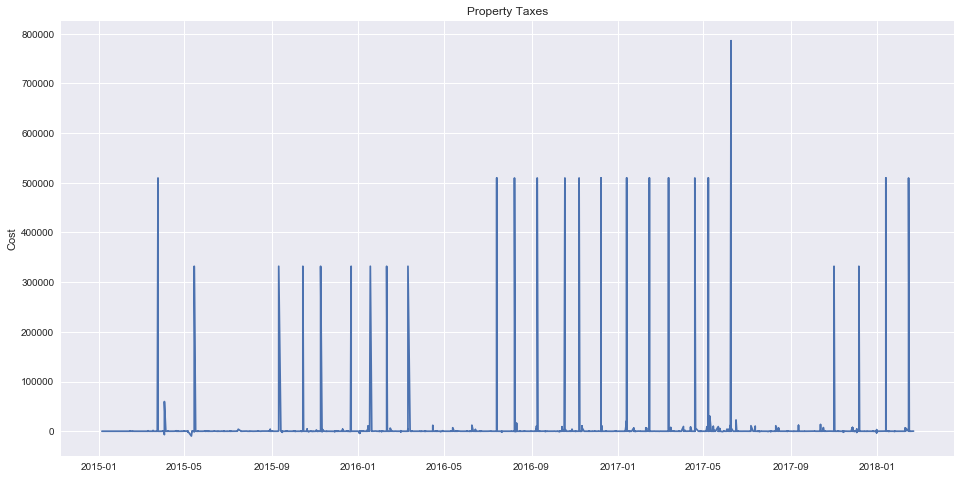

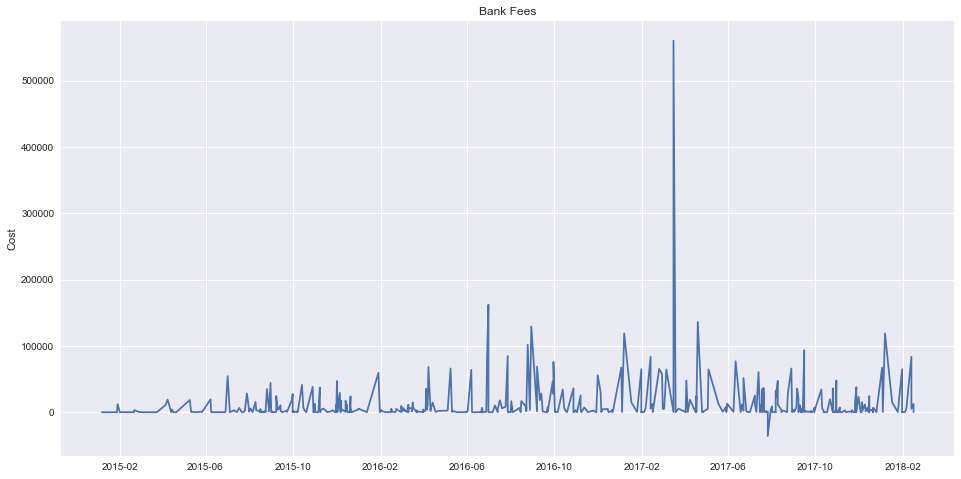

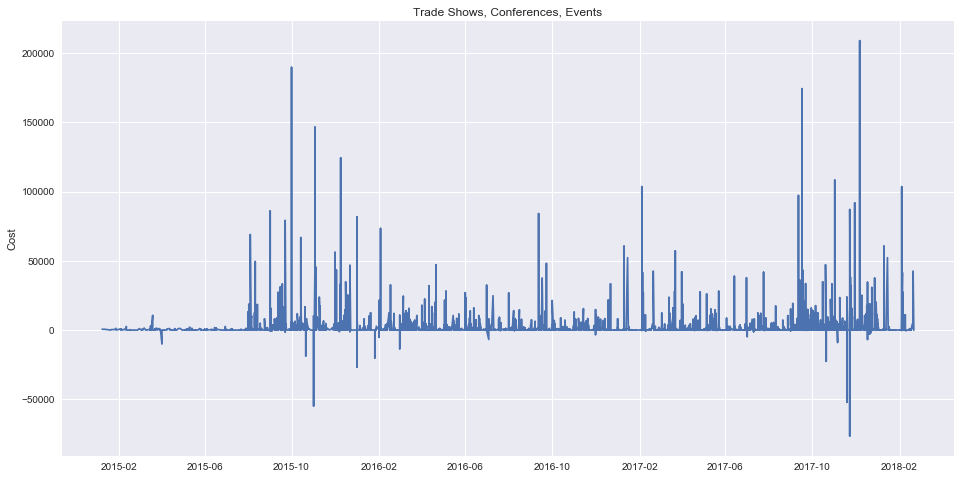

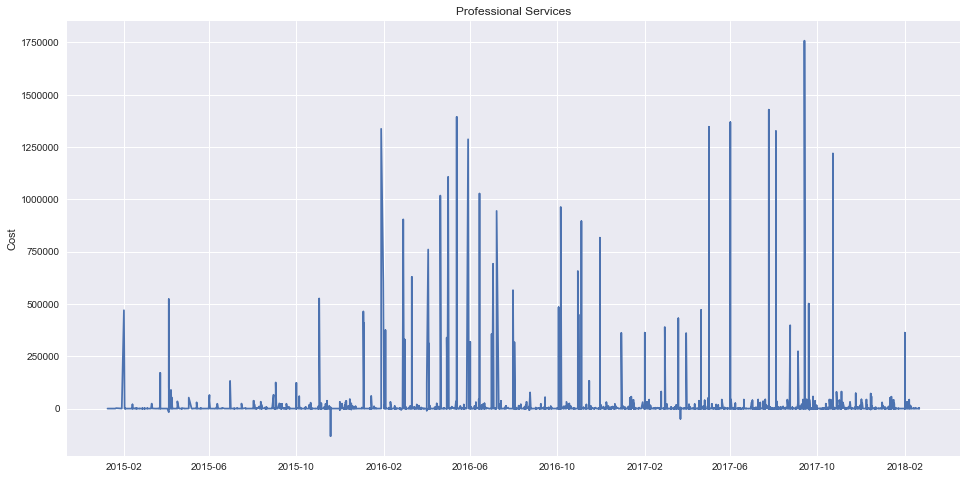

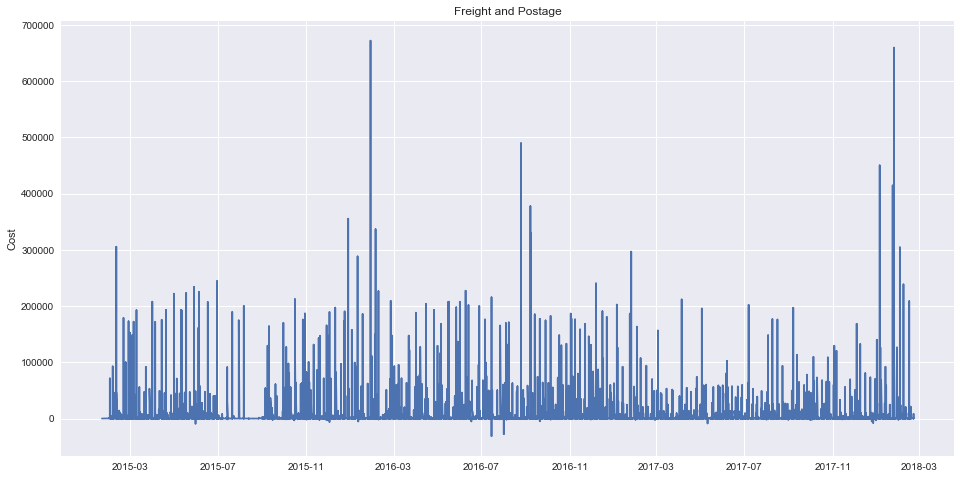

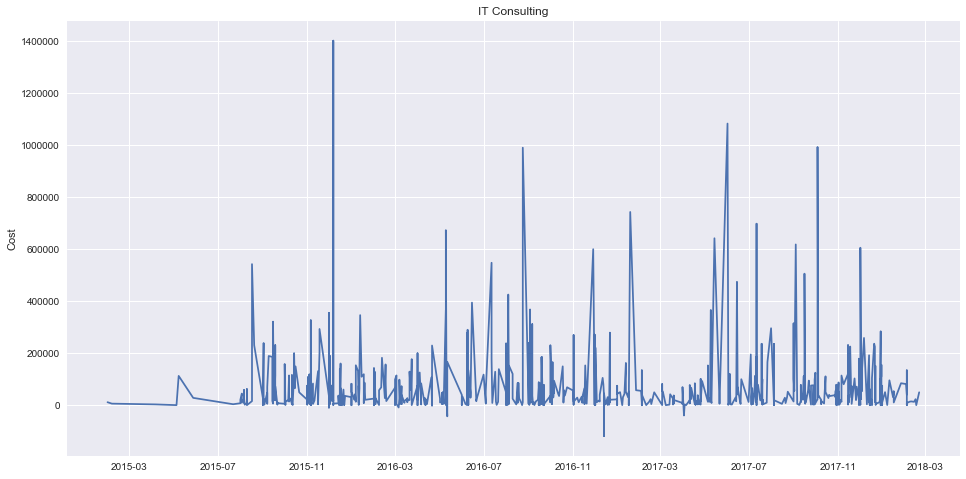

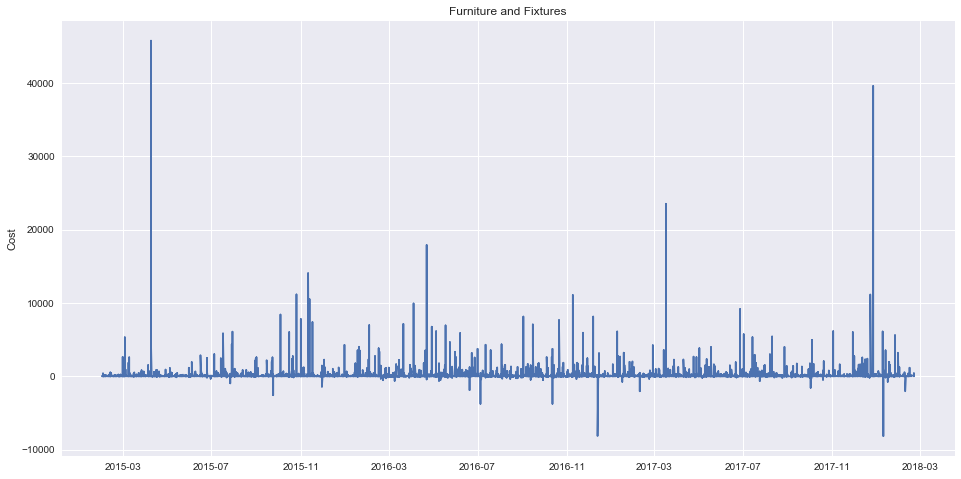

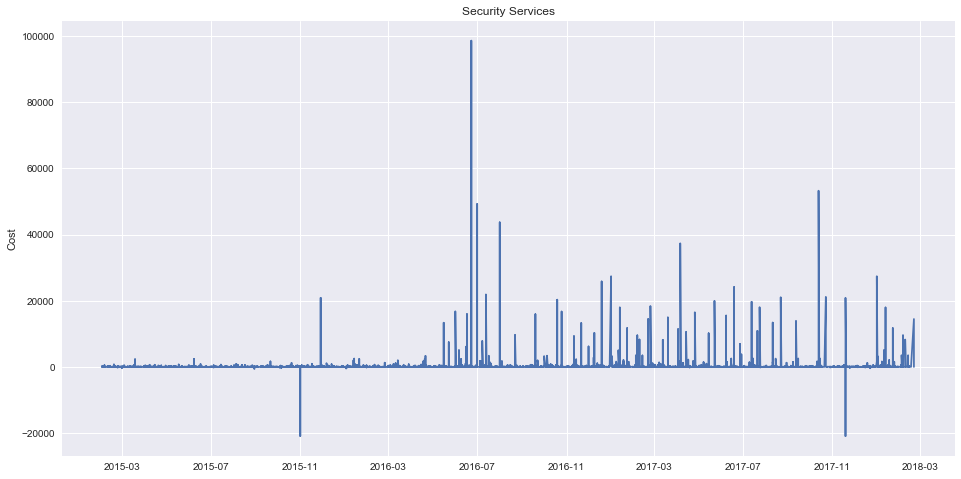

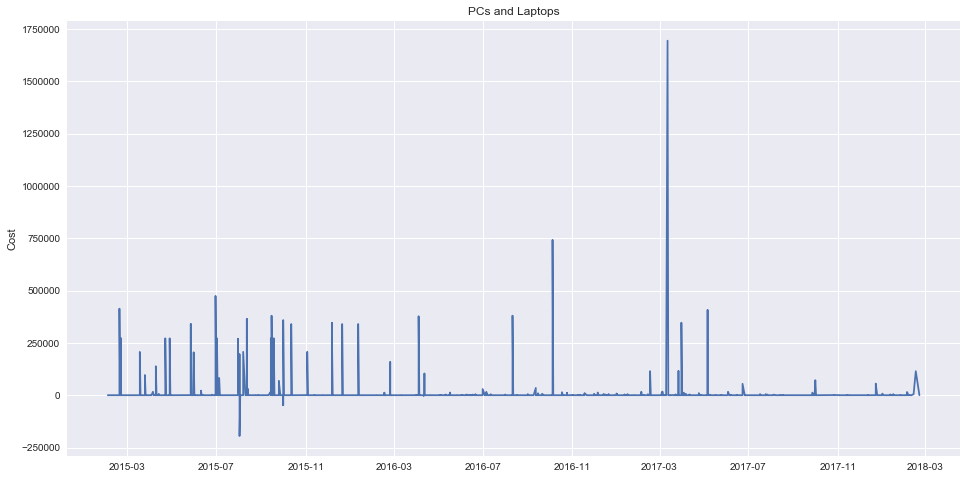

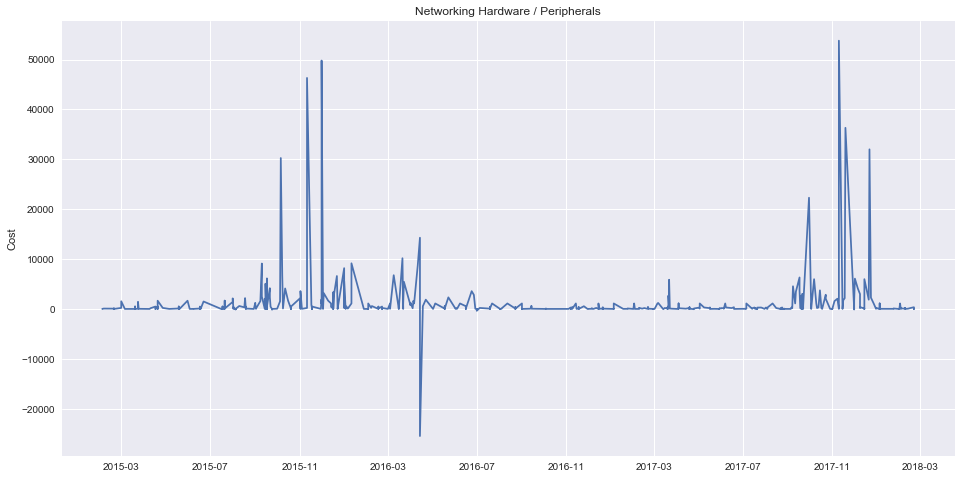

In [35]:
for i in categ_df:  # iteratively plots cost (amount) vs date (transation_date)
    plt.figure(figsize =(16,8))
    plt.plot(i[1].index, i[1]['amount'])
    plt.title(i[0])
    plt.ylabel('Cost')
    plt.grid(b=True)
    plt.show()
    plt.clf()

These expense profiles give a nice view of each category over time. Its surprising how spotty some of the categories are during certain periods. Do their expenses there actually drop to zero, or is data missing?

#### By category total cost 

In [36]:
totals = [[] for i in categ_df]
for i in range(len(categ_df)): # iteratively sums and stores the amount column for each category
    total = sum(categ_df[i][1]['amount'])
    totals[i] = total

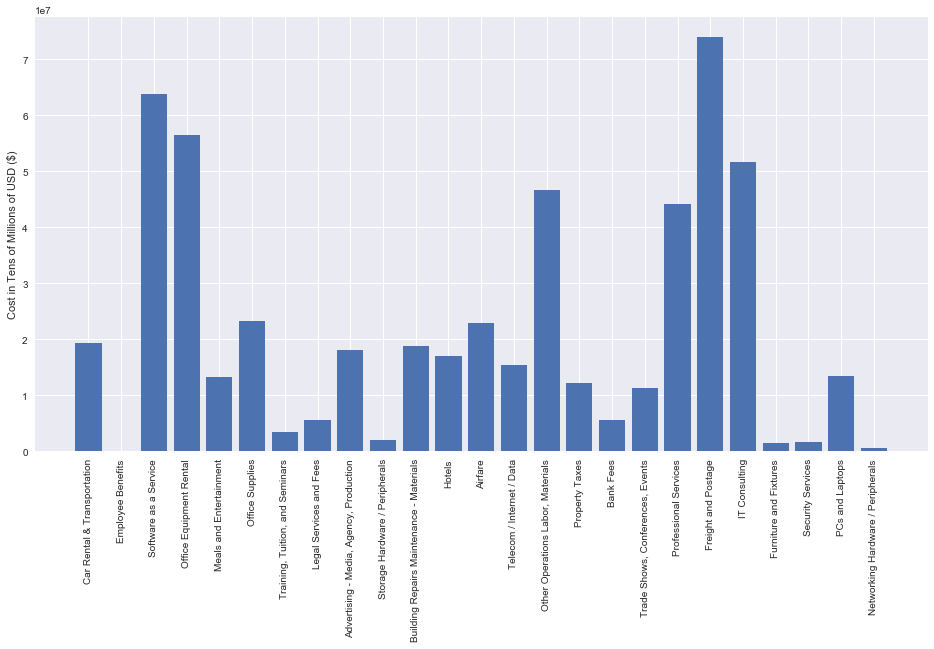

In [37]:
plt.figure(figsize =(16,8))
plt.bar([i for i in range(len(categories))], totals) 
plt.xticks([i for i in range(len(categories))], categories, rotation = 90)
plt.ylabel('Cost in Tens of Millions of USD ($)')
plt.show()

Categories I think would be interesting to explore
- Car Rental & Transportation
    - ~20 million USD in 3 years seems high
- Software as a Service
    - Software licensing duplicates?
    - How many unique vendors are there?
- Hotels
    - How many unique vendors are there?
    - Is there a hotel-business partnership that can reduce the number of vendors?
- Airfare
    - How many unique vendors are there?
    - Regional partnerships with airlines?
- Other Operations Labor, Materials
    - ~45 million USD is a lot for an nondescript name

#### Total Cost Verification Test

In [39]:
if round(sum(totals), 2) == round(sum(transactions_complete['amount']), 2):  ## Sanity check
    print(True)
else:
    print('Not quite')

True


### By business unit name expense

In [42]:
units = list(transactions_complete['business_unit_name'].unique()) # creates list of unique business_unit_name
cost_centers = list(transactions_complete['cost_center_name'].unique()) # creates list of unique cost_center_name
print(len(units), len(cost_centers))
print(units)
print(cost_centers)

4 11
['Techtrades, Inc. (HQ)', 'Techtrades LTD (UK)', 'Zeus Banking, Inc.', 'Techtrades NK (Japan)']
['General Management', 'Sales', 'Operations', 'Marketing', 'Corporate IT', 'Product', 'Executive', 'Human Resources', 'Finance', 'Facilities', 'Legal']


In [46]:
unit_df_list = [[] for i in units]

for i in range(len(units)): # iterativesly creates a list of dataframes based on the unique unit names.
    new_df = transactions_complete.loc[transactions_complete['business_unit_name'] == units[i]]
    unit_df_list[i] = new_df

#### By unit name dataframe info

In [47]:
unit_dfs = [list(a) for a in zip(units, unit_df_list)]
for i in unit_dfs: # creates a 2d list [['unit_name', unit_df],['unit_name', unit_df],...]
    print(i[0])
    print(i[1].info())
    print('##########################################')

Techtrades, Inc. (HQ)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383405 entries, 2015-01-01 to 2018-02-26
Data columns (total 12 columns):
transaction_id        383405 non-null object
transaction_type      383405 non-null object
employee_name         319349 non-null object
business_unit_name    383405 non-null object
account_name          383405 non-null object
cost_center_name      383405 non-null object
expense_type          383405 non-null object
category              383405 non-null object
amount                383405 non-null float64
vendor                383405 non-null object
normalized_vendor     383405 non-null object
website               267074 non-null object
dtypes: float64(1), object(11)
memory usage: 38.0+ MB
None
##########################################
Techtrades LTD (UK)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385215 entries, 2015-01-01 to 2018-02-21
Data columns (total 12 columns):
transaction_id        385215 non-null object
transaction_type

In [49]:
total_len = 0
for i in unit_dfs:  ## Sanity check: All data accounted for 
    total_len += len(i[1])
if total_len == len(transactions_complete):  # Checks if total length of subset dataframes == length of starting dataframe
    print(True)  # ensures I still have all the data I expect to have
else:
    print('Missing rows')

True


#### By unit name amount by date

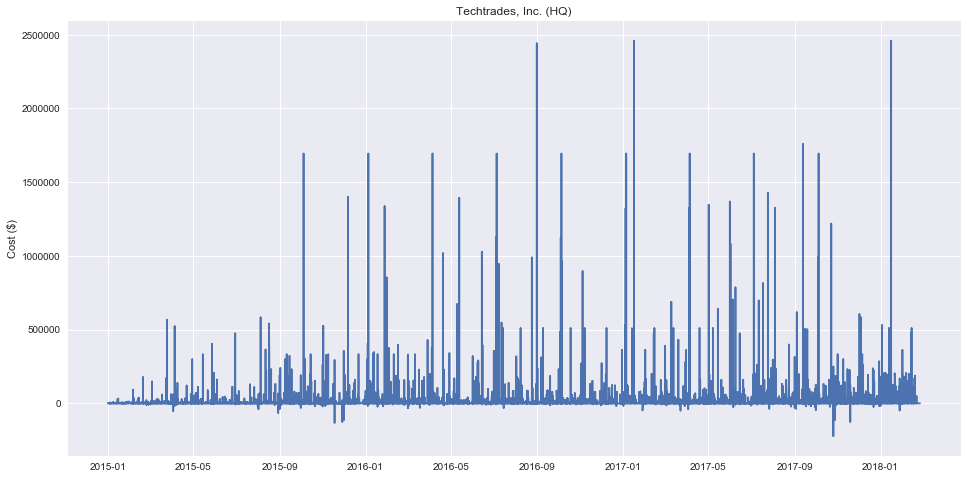

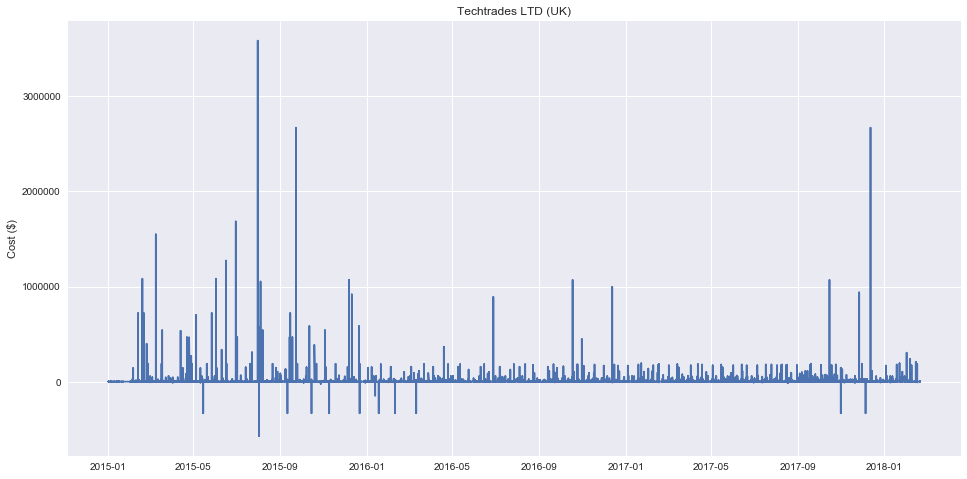

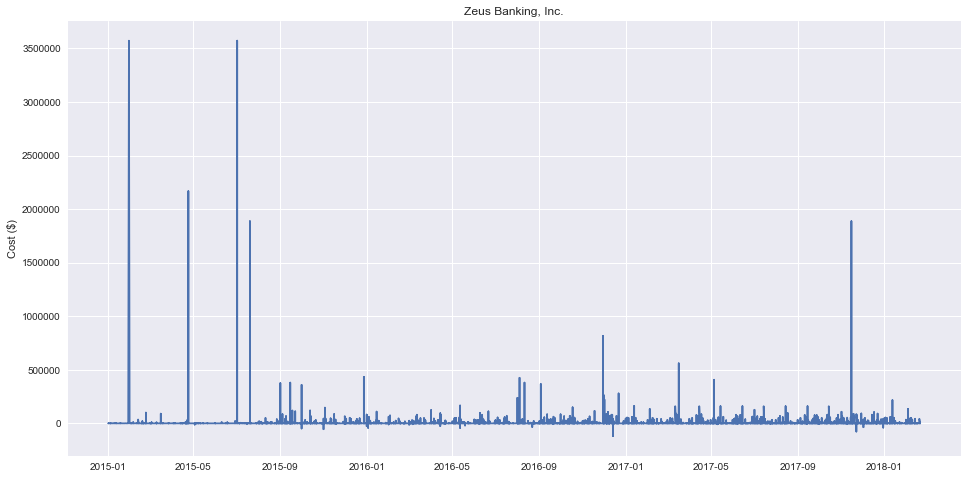

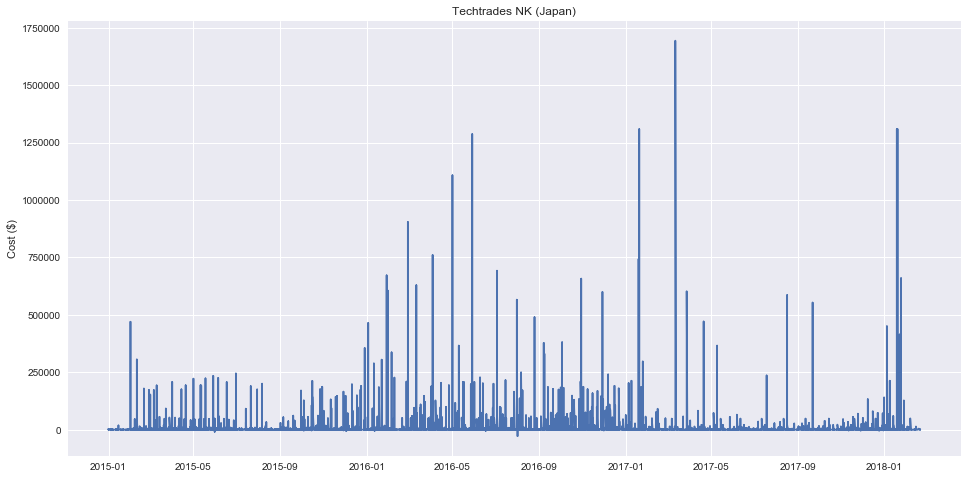

In [50]:
for i in unit_dfs:  # Iteratively plot Cost vs Date for each unit_name
    plt.figure(figsize =(16,8))
    plt.plot(i[1].index, i[1]['amount'])
    plt.title(i[0]) # unit_name
    plt.ylabel('Cost ($)')
    plt.show()
    plt.clf() # clears figure, so next can be generated

Each business unit in the data has a pretty different expense profile. I expected a little more similarity in these graphs, but that might have been a naive expectation.

#### By Unit Total Spending 

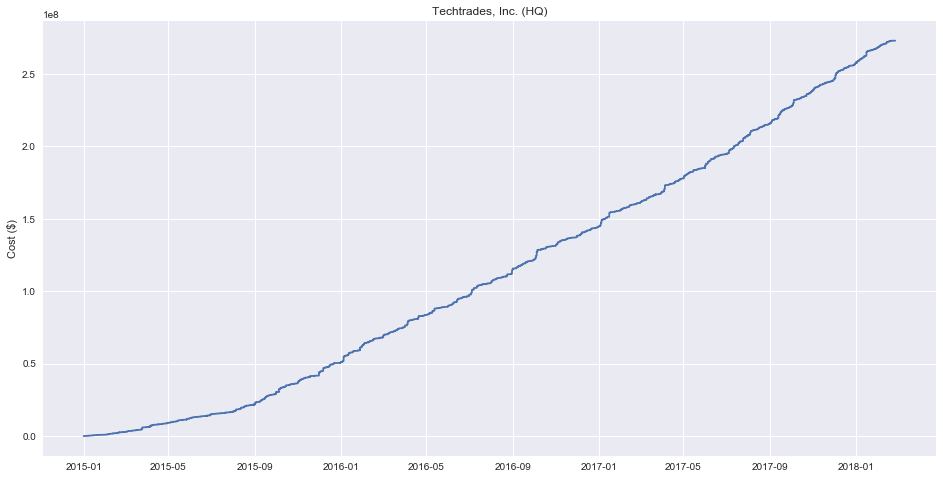

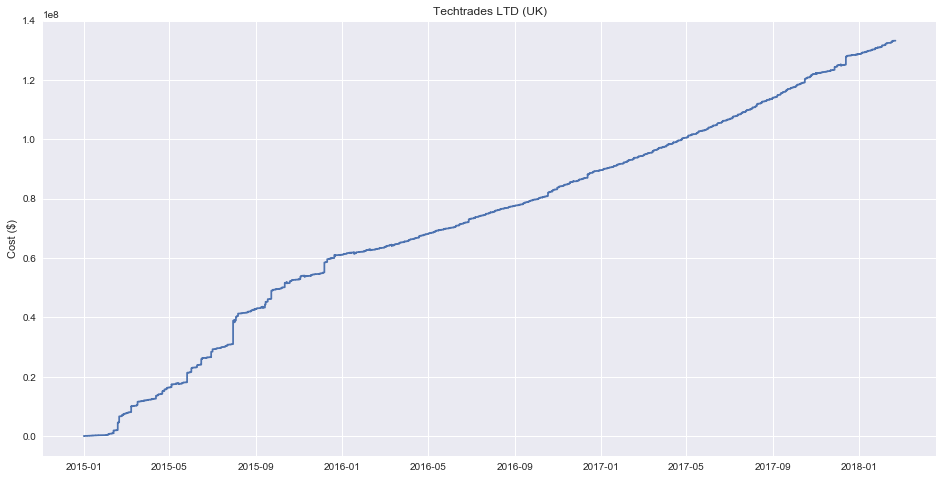

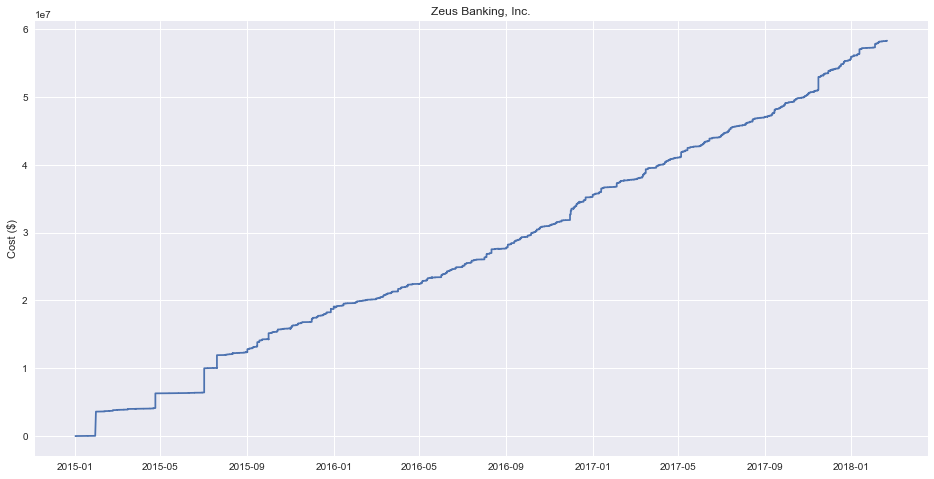

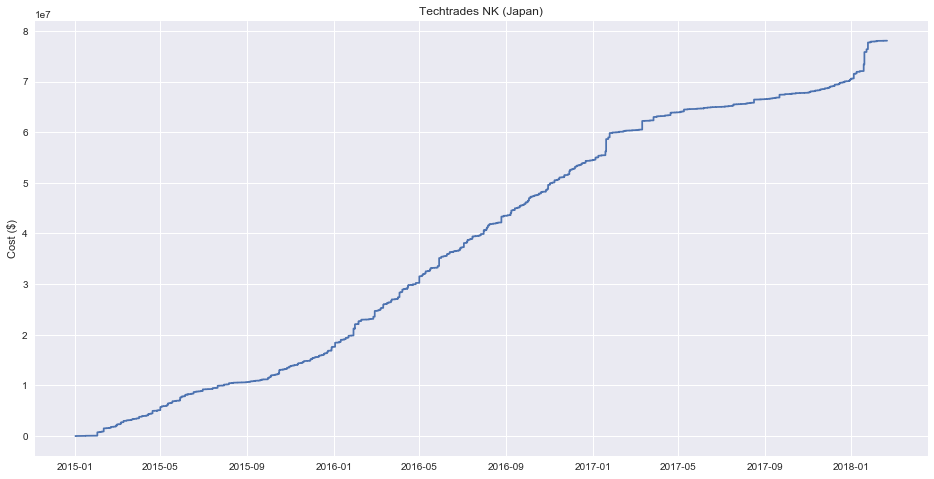

In [51]:
for i in unit_dfs:  # Iteratively plot Cost vs Date for each unit_name   
    temp_list = list(i[1]['amount'])
    plot_list = iterative_sum(temp_list)
    
    plt.figure(figsize =(16,8))
    plt.plot(i[1].index, plot_list)
    plt.title(i[0]) # unit_name
    plt.ylabel('Cost ($)')
    plt.show()
    plt.clf() # clears figure, so next can be generated

#### By Unit Name - Amount by Cost Center

In [52]:
unitCenter_labels = [[str(x)+'_'+str(y) for y in cost_centers] for x in units] #2D list of columns for new dataframes
print(unitCenter_labels[0])

['Techtrades, Inc. (HQ)_General Management', 'Techtrades, Inc. (HQ)_Sales', 'Techtrades, Inc. (HQ)_Operations', 'Techtrades, Inc. (HQ)_Marketing', 'Techtrades, Inc. (HQ)_Corporate IT', 'Techtrades, Inc. (HQ)_Product', 'Techtrades, Inc. (HQ)_Executive', 'Techtrades, Inc. (HQ)_Human Resources', 'Techtrades, Inc. (HQ)_Finance', 'Techtrades, Inc. (HQ)_Facilities', 'Techtrades, Inc. (HQ)_Legal']


In [54]:
unitCenters = unitCenter_labels

for i in range(len(unit_dfs)): #
    for j in range(len(cost_centers)):
        df = unit_dfs[i][1]
        subset_df = df.loc[df['cost_center_name'] == cost_centers[j]]
        unitCenters[i][j] = subset_df['amount']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


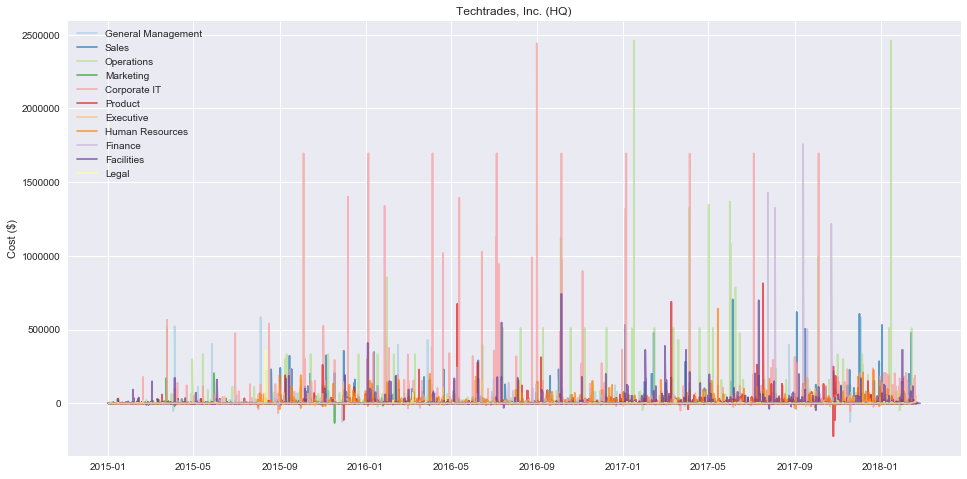

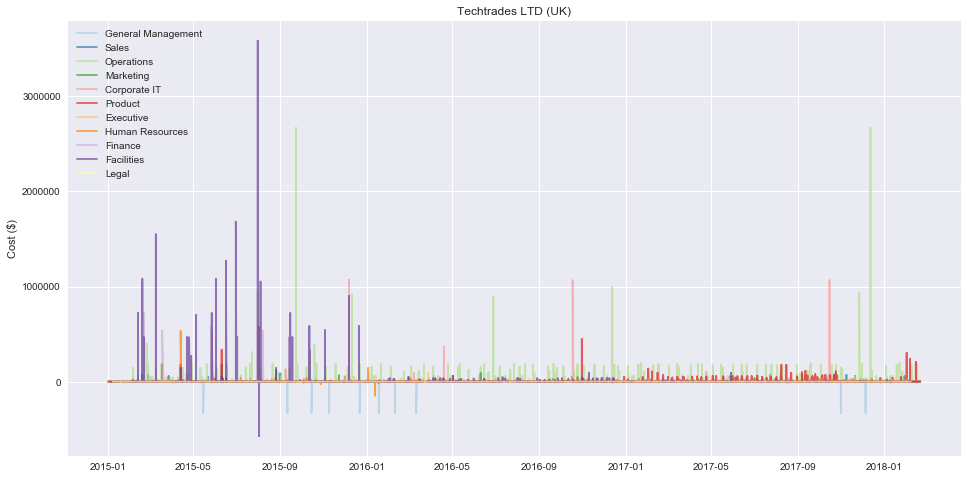

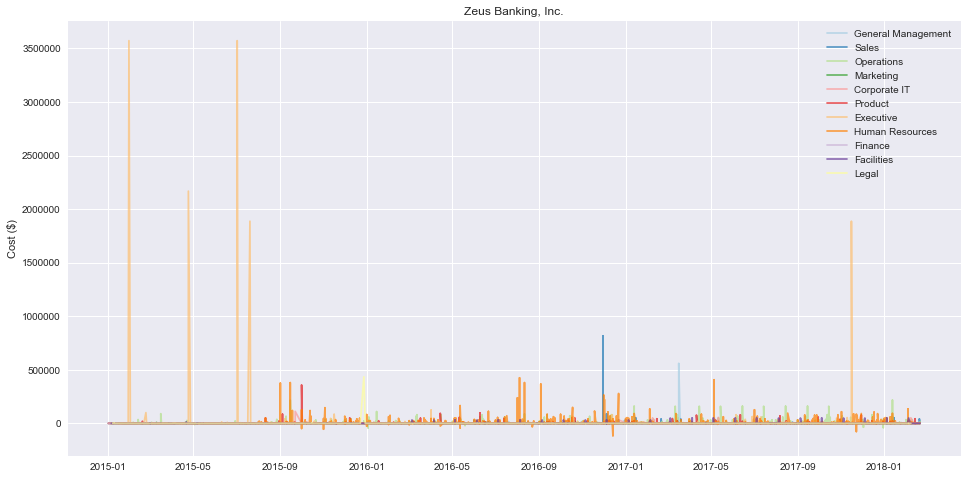

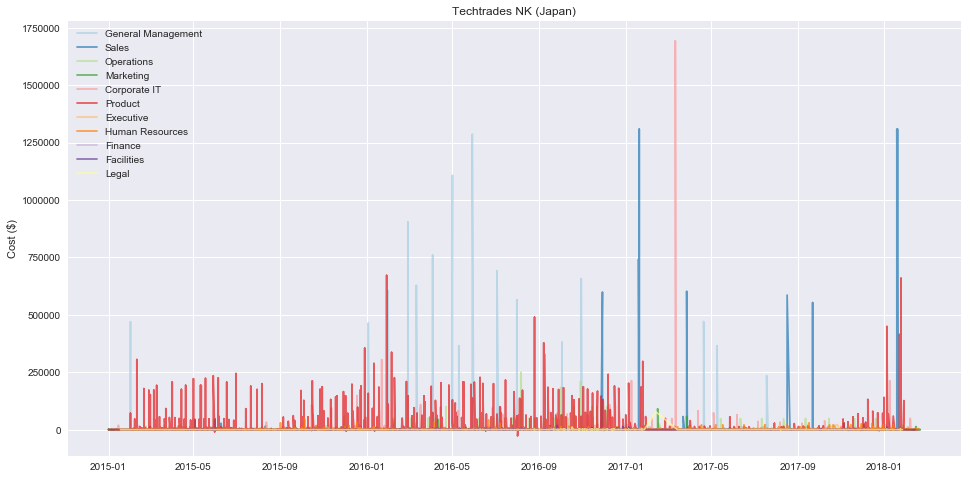

In [533]:
cm = plt.get_cmap('Paired') #color
count = 0
for unit in unitCenters:
    fig = plt.figure(figsize =(16,8))
    ax = fig.add_subplot(111)
    ax.set_color_cycle([cm(1.*i/11) for i in range(11)])
    for cost_center in unit:
        ax.plot(cost_center.index, cost_center, alpha=0.7)
    ax.set_title(unit_dfs[count][0])
    count += 1
    ax.legend(cost_centers)
    ax.set_ylabel('Cost ($)')
    plt.show()
    plt.clf()

There seems to be a lot of corporate IT spending for Techtrades, Inc. (HQ) and Techtrades NK (Japan). There is both periodic spending and not, I'm going to look into it.

#### Corporate IT spending

In [536]:
corp_it = transactions_complete.loc[transactions_complete['cost_center_name'] == 'Corporate IT']
print('Total number of transactions under Corporate IT: {}'.format(len(new_df)))
print('Total cost of transactions under Corporate IT: ${}'.format(convertNumToCommaSep(sum(new_df['amount']))))

Total number of transactions under Corporate IT: 225
Total cost of transactions under Corporate IT: $26,328


##### Amount vs Date

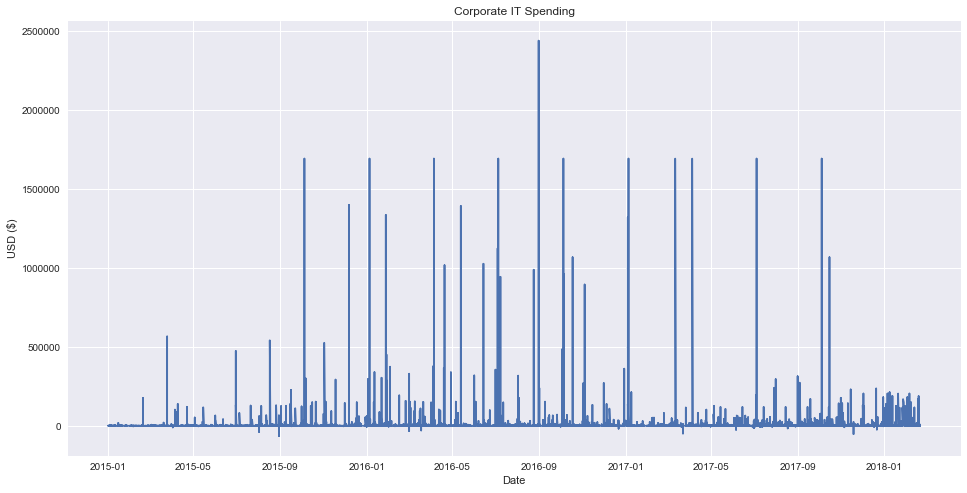

In [550]:
plt.figure(figsize=(16,8))
plt.plot(corp_it.index, corp_it['amount'])
plt.ylabel('USD ($)')
plt.xlabel('Date')
plt.title('Corporate IT Spending')
plt.show()
plt.clf()

##### Amount vs Category

In [551]:
heights = [] # barplot heights
for i in categories:
    temp_df = corp_it.loc[corp_it['category'] == i]
    heights.append((i,sum(temp_df['amount'])))
temp_df = None

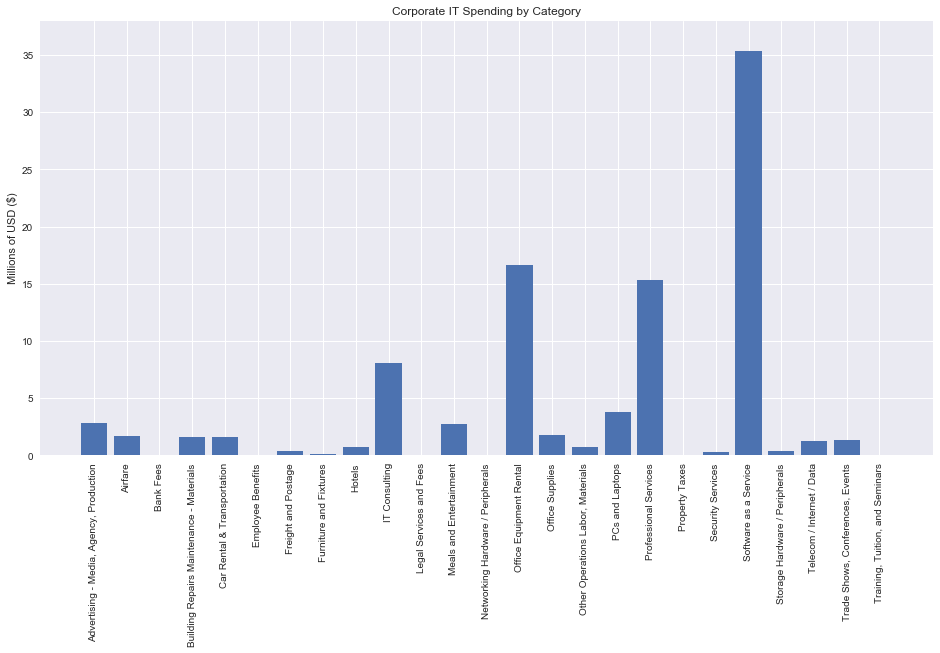

In [552]:
###Plot
plt.figure(figsize=(16,8))
plt.bar([i[0] for i in heights], [i[1] for i in heights])
plt.xticks(rotation = 90)
plt.yticks([x*5000000 for x in range(8)], [0,5,10,15,20,25,30,35,40])
plt.ylabel('Millions of USD ($)')
plt.ylim(0,38000000)
plt.title('Corporate IT Spending by Category')
plt.show()
plt.clf()

##### Corporate IT Professional Services Spending

In [539]:
corp_it_ProServ = corp_it.loc[corp_it['category'] == 'Professional Services']
print('The number of transactions under the Professional Services category is {}.'.format(len(corp_it_ProServ)))
print('Total spending for this category: $'+convertNumToCommaSep(sum(corp_it_ProServ['amount'])))

The number of transactions under the Professional Services category is 1833.
Total spending for this category: $15,299,364


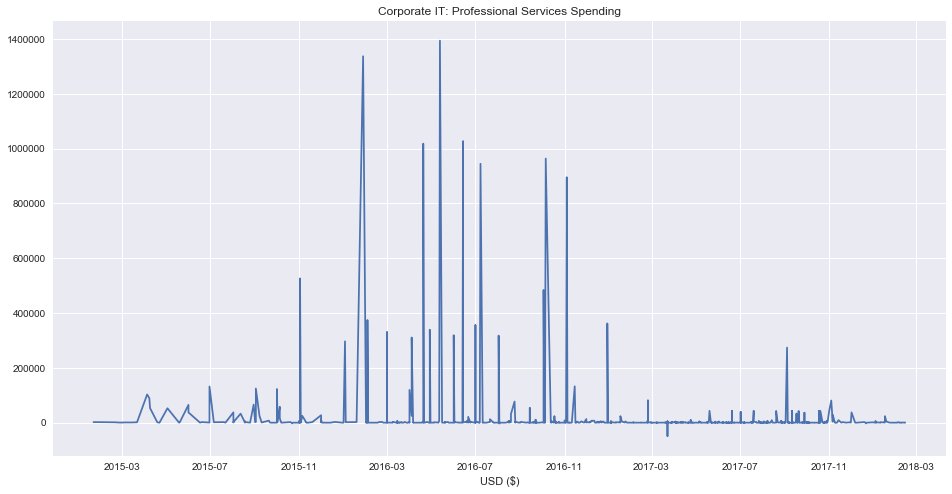

In [540]:
plt.figure(figsize=(16,8))
plt.plot(corp_it_ProServ.index, corp_it_ProServ['amount'])
plt.xlabel('USD ($)')
plt.title('Corporate IT: Professional Services Spending')
plt.show()
plt.clf()

In [541]:
print('The number of unique vendors under the Professional Services category is {}.'.format(len(corp_it_ProServ['normalized_vendor'].unique())))

The number of unique vendors under the Professional Services category is 214.


##### Corporate IT Software as a Service Spending

In [545]:
corp_it_SSS = corp_it.loc[corp_it['category'] == 'Software as a Service']
print('Total spending for this category: $'+convertNumToCommaSep(sum(corp_it_SSS['amount'])))

Total spending for this category: $35,358,205


Text(0.5,1,'Corporate IT: Software as a Service')

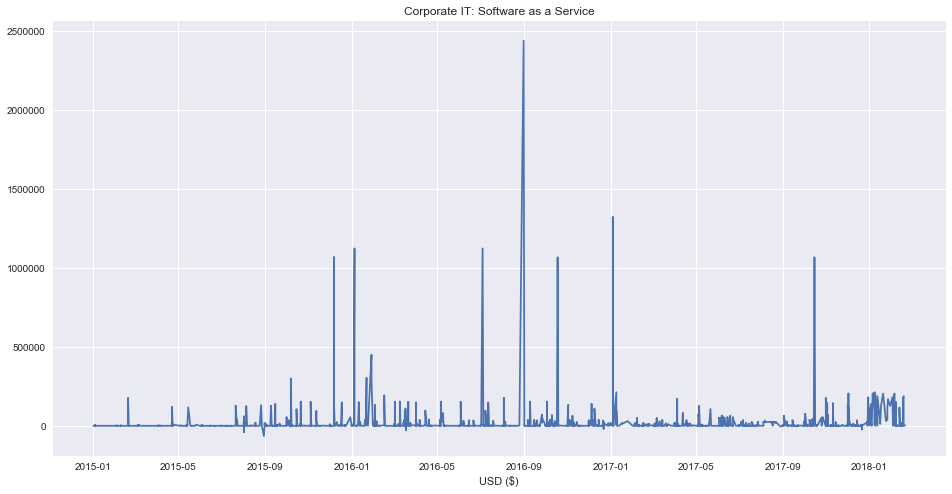

In [546]:
plt.figure(figsize=(16,8))
plt.plot(corp_it_SSS.index, corp_it_SSS['amount'])
plt.xlabel('USD ($)')
plt.title('Corporate IT: Software as a Service')

In [544]:
print('The number of transaction for Software as a Service was {}.'.format(len(corp_it_SSS['normalized_vendor'])))
print('The number of unique vendors for Software as a Service was {}'.format(len(corp_it_SSS['normalized_vendor'].unique())))

The number of transaction for Software as a Service was 0.
The number of unique vendors for Software as a Service was 0


##### Corporate IT Office Equipment Rental Spending

In [547]:
corp_it_eqpRent = corp_it.loc[corp_it['category'] == 'Office Equipment Rental']
print('Total number of transactions under Corporate IT:Office Equipment Rental: {}'.format(len(corp_it_eqpRent)))
print('Total spending for this category: ${}'.format(convertNumToCommaSep(sum(corp_it_eqpRent['amount']))))

Total number of transactions under Corporate IT:Office Equipment Rental: 485
Total spending for this category: $16,664,289


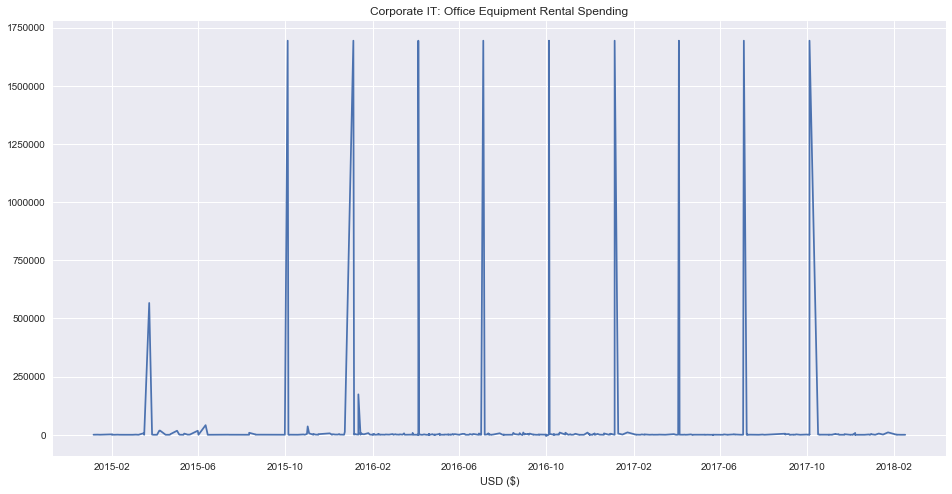

In [548]:
plt.figure(figsize=(16,8))
plt.plot(corp_it_eqpRent.index, corp_it_eqpRent['amount'])
plt.xlabel('USD ($)')
plt.title('Corporate IT: Office Equipment Rental Spending')
plt.show()
plt.clf()

The same periodic expense 

In [554]:
print('The number of unique vendors was {}.'.format(len(corp_it_eqpRent['normalized_vendor'].unique())))

The number of unique vendors was 31.


In [555]:
corp_it_eqpRent_majorTrans = corp_it_eqpRent.loc[corp_it_eqpRent['amount'] >= 100000]
print('The vendors of the transactions for transactions greater than $100,000 were: {}'.format(corp_it_eqpRent_majorTrans['normalized_vendor'].unique()))

The vendors of the transactions for transactions greater than $100,000 were: ['IBM']


In [557]:
ibm_eqpRent = corp_it_eqpRent.loc[corp_it_eqpRent['normalized_vendor'] == 'IBM']
print('Total spending by Corp IT at IBM on Equipment Rentals: $'+convertNumToCommaSep(sum(ibm_eqpRent['amount'])))
ibm_corp_it = corp_it.loc[corp_it['normalized_vendor'] == 'IBM']
print('Total spending by Corp IT at IBM: $'+convertNumToCommaSep(sum(ibm_corp_it['amount'])))
ibm_eqpRent.head()

Total spending by Corp IT at IBM on Equipment Rentals: $16,159,085
Total spending by Corp IT at IBM: $28,192,090


,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015-03-25,AP.100.82394,ap,NaN,"Techtrades, Inc. (HQ)",Equipment & Supplies,Corporate IT,Equipment & Supplies,Office Equipment Rental,566477.06,IBM,IBM,IBM.COM
2015-04-08,AP.100.82389,ap,NaN,"Techtrades, Inc. (HQ)",Equipment & Supplies,Corporate IT,Equipment & Supplies,Office Equipment Rental,17292.88,IBM,IBM,IBM.COM
2015-04-09,AP.100.82386,ap,NaN,"Techtrades, Inc. (HQ)",Equipment & Supplies,Corporate IT,Equipment & Supplies,Office Equipment Rental,18351.63,IBM,IBM,IBM.COM
2015-04-24,Pcards.104.4684,pcard,Farra Bahaa Al,"Techtrades, Inc. (HQ)",Equipment & Supplies,Corporate IT,Equipment & Supplies,Office Equipment Rental,3158.01,IBM,IBM,IBM.COM
2015-05-03,AP.100.82381,ap,NaN,"Techtrades, Inc. (HQ)",Equipment & Supplies,Corporate IT,Equipment & Supplies,Office Equipment Rental,17292.88,IBM,IBM,IBM.COM


Major expenses at IBM are probably expected.

#### Total Costs by Unit and Cost Center

In [558]:
totals_df = pd.DataFrame(columns=['cost_center', 'total_expenses', '%_=9'])
totals_df['cost_center'] = ['General Management', 'Sales', 'Operations', 'Marketing', 'Corporate IT', 'Product', 'Executive', 'Human Resources', 'Finance', 'Facilities', 'Legal']
for i in range(len(unitCenters)):
    totals = []
    for k in range(len(unitCenters[i])):
        totals.append(sum(unitCenters[i][k]))

    print('####################################\n')
    print(units[i]+'\n')
    print_list = zip(cost_centers, totals)
    for pair in print_list:
        print('{}: ${} \t\t {}%'.format(str(pair[0]), convertNumToCommaSep(pair[1]), round(((pair[1]/sum(totals))*100),2)))
    print('Total 3 year expenses for {}: ${}\n'.format(str(units[i]), convertNumToCommaSep(sum(totals))))


####################################

Techtrades, Inc. (HQ)

General Management: $14,143,193 		 5.18%
Sales: $36,242,939 		 13.28%
Operations: $41,528,525 		 15.22%
Marketing: $4,467,801 		 1.64%
Corporate IT: $81,386,691 		 29.82%
Product: $18,144,527 		 6.65%
Executive: $8,205,081 		 3.01%
Human Resources: $32,334,543 		 11.85%
Finance: $10,688,036 		 3.92%
Facilities: $24,654,823 		 9.03%
Legal: $1,134,861 		 0.42%
Total 3 year expenses for Techtrades, Inc. (HQ): $272,931,019

####################################

Techtrades LTD (UK)

General Management: $3,413,046 		 2.56%
Sales: $12,655,754 		 9.5%
Operations: $45,944,503 		 34.49%
Marketing: $5,466,133 		 4.1%
Corporate IT: $7,401,380 		 5.56%
Product: $15,018,565 		 11.27%
Executive: $1,242,205 		 0.93%
Human Resources: $3,465,350 		 2.6%
Finance: $5,289,192 		 3.97%
Facilities: $33,109,454 		 24.85%
Legal: $221,240 		 0.17%
Total 3 year expenses for Techtrades LTD (UK): $133,226,822

####################################

Zeus B

I thought there might be some sort of notable trend in which departments (cost_centers) were costing the businesses (business_units) the most that I could exploit for savings, but each business seems to have different expense profiles, at least when looked at by department. I need to break up the amounts by year/quarter. 

### Freight and Postage

In [341]:
fandp = transactions_complete.loc[transactions_complete['category'] == 'Freight and Postage']
print('The total number of transactions under the Freight and Postage category is: {}'.format(len(fandp)))

The total number of transactions under the Freight and Postage category is: 50976


In [342]:
print('The number of vendors under this category is {}'.format(len(fandp.normalized_vendor.value_counts())))

The number of vendors under this category is 1010


In [343]:
fandp_vendors = fandp.normalized_vendor.unique()

In [344]:
fandp.index = fandp.index.to_period('Q')

#### Total Freight and Postage Cost by Quarter

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

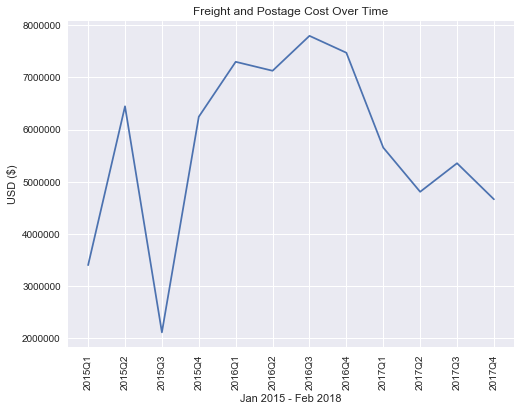

In [345]:
fandp_q_sum = sum_by_quarter(periods, fandp)

plt.figure(figsize=(8,6))
plt.plot(periods, fandp_q_sum)
plt.title('Freight and Postage Cost Over Time')
plt.ylabel('USD ($)')
plt.xlabel('Jan 2015 - Feb 2018')
plt.xticks(rotation=90)

#### Cost by vendor:

In [359]:
vendor_dfs = []
fandp_vendors_100k = []
for vendor in fandp_vendors:
    temp_df = fandp.loc[fandp['normalized_vendor'] == vendor]
    if sum(temp_df.amount) >= 150000:
        fandp_vendors_100k.append(vendor)
        vendor_dfs.append(temp_df)
    

In [360]:
vendor_q_sums = []
for vendor in vendor_dfs:
    vendor = sum_by_quarter(periods, vendor)
    vendor_q_sums.append(vendor)

Text(0.5,1,'Total Quarterly Expense By Vendor')

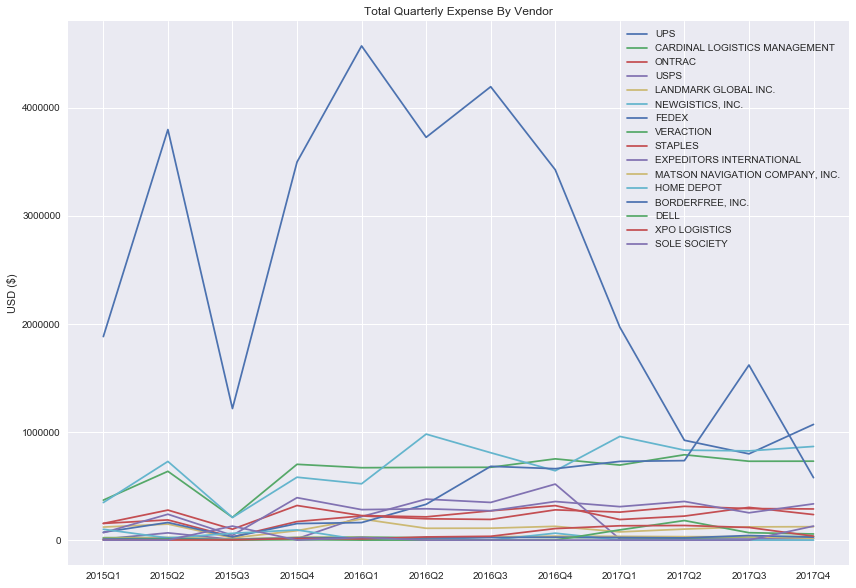

In [361]:
plt.figure(figsize=(14,10))
for vendor in vendor_q_sums:
    plt.plot(periods, vendor)
plt.ylabel('USD ($)')
plt.legend(fandp_vendors_100k)
plt.title('Total Quarterly Expense By Vendor')

This plot is for vendors that billed for at least $150,000.

In [559]:
ups = fandp.loc[fandp['normalized_vendor'] == 'UPS']
print('The number of transactions with UPS in this category is {}'.format(len(ups)))

The number of transactions with UPS in this category is 11642


In [560]:
print('The mean transaction amount at UPS was ${}'.format(ups.amount.mean()))

The mean transaction amount at UPS was $2961.4306974746046


In [561]:
print('The total amount spent at UPS for this category was ${}'.format(ups.amount.sum()))

The total amount spent at UPS for this category was $34476976.18


This is the biggest expense category. I'm sure there are insights here that could be worked out with some time, but I think its a bit of a rabbit hole and I can probably find something easier to parse out. 

### By Employee

In [531]:
employees = transactions_complete.employee_name.unique()
print('There are {} employees'.format(len(employees)))

There are 1230 employees


In [563]:
employee_dfs = [] # for averaging
employee_100k_dfs = [] # To plot the high spenders

for em in employees: # loops to create to lists of employees
    employee_dfs.append(transactions_complete.loc[transactions_complete['employee_name'] == em])
    temp_df = transactions_complete.loc[transactions_complete['employee_name'] == em]
    if sum(temp_df.amount) >= 500000:
        employee_100k_dfs.append(temp_df)
        employee_100k.append(em)

In [564]:
employ_q_100k_sum = []
for em in employee_100k_dfs: # loops over list to create a list of dataframes for plotting
    em = sum_by_quarter(periods, em)
    employ_q_100k_sum.append(em)

In [565]:
employ_q_sums = []
for em in employee_dfs: # loops over list to create a list of dataframes for stats
    em = sum_by_quarter(periods, em)
    employ_q_sums.append(em)

In [566]:
employ_q_sums_df = pd.DataFrame(employ_q_sums, columns=periods) # creates a new dataframe
employ_q_sums_df.index = employees

In [562]:
print('The number of rows in the new dataframe is {}'.format(len(employ_q_sums_df)))

The number of rows in the new dataframe is 1230


In [457]:
employ_q_sums_df.head()

,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4
Ahmed Mohamed Al-Merjabi,1122.46,1394.95,627.31,717.50,476.14,1048.07,526.76,296.27,1130.29,3740.39,1798.52,1364.73
Amina Bakhit,9134.34,4009.88,5742.39,3413.50,8319.06,4059.64,6941.27,12906.58,4133.84,2424.33,2664.84,7978.60
Andreas Bube,5557.73,10803.48,8899.43,11590.05,17437.95,11663.71,10232.25,10923.27,13383.72,10204.21,10949.15,8284.70
Andres Chocho,1151.05,630.71,1669.59,1348.63,3232.18,112.55,1733.34,619.36,1338.30,4167.60,4443.16,1363.94
Araujo Luiz Alberto De,1787.67,1026.09,757.81,1265.48,1352.50,290.82,829.74,1345.84,2707.42,1647.44,1145.48,1900.99


#### Quarterly Average Employee Spending

In [567]:
employ_q_std = []
for col in employ_q_sums_df.columns: #calculates the standard error for each column
    stddev = employ_q_sums_df[col].std()
    employ_q_std.append(stddev)

Text(0,0.5,'USD ($)')

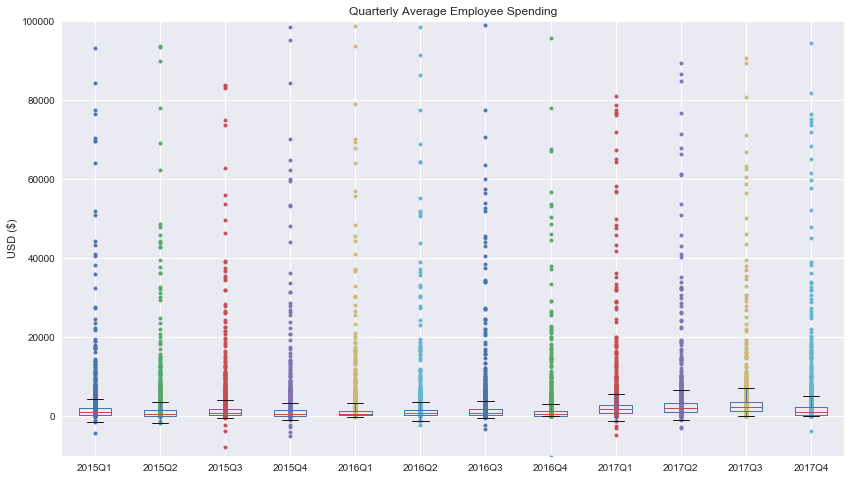

In [581]:
fig = plt.figure(figsize=(14,8))
employ_q_sums_df.boxplot()
plt.ylim(-10000, 100000)
count = 1
for col in employ_q_sums_df.columns:
    plt.scatter([count for i in range(len(employ_q_sums_df[col]))], employ_q_sums_df[col], marker=".")
    count+=1
plt.errorbar([count for i in range(len(employ_q_sums_df.columns))], employ_q_std)
plt.title('Quarterly Average Employee Spending')
plt.ylabel('USD ($)')

There are lots of transactions outside the average. I'll have to try to look at users consistently outside of the average, or users whose averages jump during certain periods. Moving to months as periods would increase sensitivity and clarity for this analysis.

#### Expense vs Time by Employees for Employees that Spent More than $500,000

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


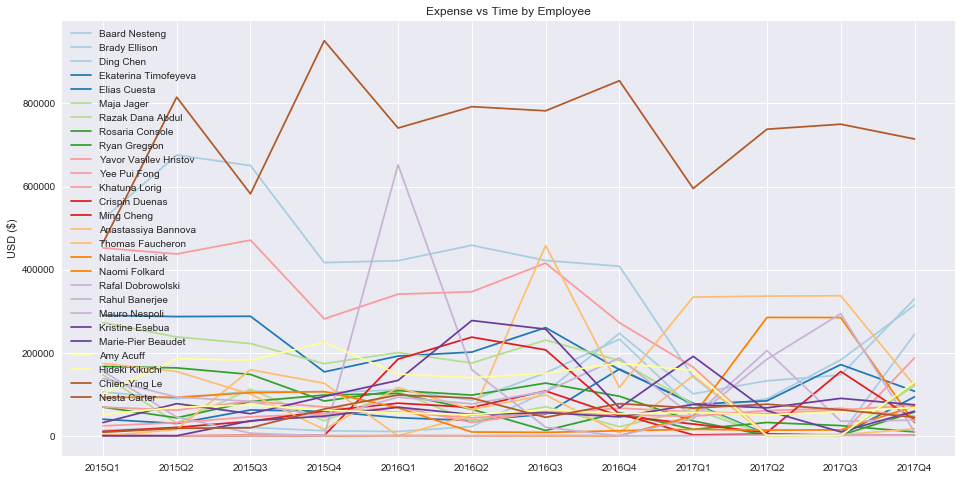

In [432]:
cm = plt.get_cmap('Paired')
fig = plt.figure(figsize =(16,8))
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/len(employee_100k)) for i in range(len(employee_100k))])
legend = employee_100k

for i in range(len(employee_100k)):
    ax.plot(periods, employ_q_sum[i])
ax.set_title('Expense vs Time by Employee')
ax.set_ylabel('USD ($)')
ax.legend(legend)
plt.show()
plt.clf()

If I pursue this I think I should look at frequent spenders, not large spenders. I assume large expenses are monitored more closely than regular expenses.

##  Car Rental and Transportation

During my profiling I noticed that ~20 million dollars had been spent on car rentals and taxis. This struck me as high, so I decided to parse it out a bit more to see if I can find an actionable insight that might save the customer money. I'll first look at the number of transactions and how many vendors those transactions are associated with. My hypothesis is that a more modern taxi resource could be relied on in the vast majority of cases in order to save the business money.

In [266]:
transport_rental = transactions_complete.loc[transactions_by_date['category'] == 'Car Rental & Transportation']

In [267]:
print('There were {} total transactions under this category'.format(convertNumToCommaSep(len(transport_rental))))
print('The total cost of these transactions were: ${}'.format(convertNumToCommaSep(sum(transport_rental.amount))))
print('################## Vendor List ##################')
transport_rental.normalized_vendor.value_counts()

There were 84,586 total transactions under this category
The total cost of these transactions were: $19,362,403
################## Vendor List ##################


UBER                                         46783
TAXI                                         10267
LYFT                                          5064
BLUELINE TAXIS NEWCASTLE                      1570
O'HARE TAXI AND LIMOUSINE                      743
HERTZ CORPORATION                              666
TAXI & LIMOUSINE COMMISSION                    637
BECK TAXI LTD.                                 552
CAPITAL TAXI                                   502
MATSON NAVIGATION COMPANY, INC.                402
AMERICAN TAXI                                  394
CITY SERVICE TAXI                              377
NATIONAL CAR RENTAL                            372
BLACKTOP & CHECKER CABS                        353
MULGREW OIL & PROPANE CO.                      308
WHITTLESEA BLUE CAB                            277
SEATTLE YELLOW CAB                             254
MIAMI EXECUTIVE AIRPORT                        247
DC YELLOW CAB CO                               235
CARDINAL LOGISTICS MANAGEMENT  

There were 84,586 transactions, across 1,520 vendors. It seems like there are mislabeled entries. I'll need to pull out taxi services specifically to answer my question. I'll pull data based on taxi key words <taxi, limo, cab, uber, lyft>
This might not be an all inclusive list, but it should be a good start.

First I'm going to convert the index to period, so I can look at the data by quarter.

In [268]:
transport_rental.index = transport_rental.index.to_period("Q")  # Converts index to quarters
transport_rental.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015Q1,Pcards.104.5993,pcard,Ahmed Mohamed Al-Merjabi,"Techtrades, Inc. (HQ)",Car Rental & Taxi,General Management,Car Rental,Car Rental & Transportation,269.40,SQ *TAXI AND LIMO S,MEMPHIS INTERNATIONAL AIRPORT,NaN
2015Q1,Pcards.104.167267,pcard,Amina Bakhit,Techtrades LTD (UK),Car Rental & Taxi,Sales,Car Rental,Car Rental & Transportation,46.99,VTS CITY SERVICE TAXI,CITY SERVICE TAXI,NaN
2015Q1,Pcards.104.4801,pcard,Andres Chocho,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Operations,Car Rental,Car Rental & Transportation,311.09,SQ *SEATTLE TAXI # 625 GO,SEATTLE YELLOW CAB,SEATTLEYELLOWCAB.COM
2015Q1,Pcards.104.8168,pcard,Araujo Luiz Alberto De,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Marketing,Car Rental,Car Rental & Transportation,218.50,CHI TAXI 5724,O'HARE TAXI AND LIMOUSINE,NaN
2015Q1,Pcards.104.22026,pcard,Arnie David Girat,Techtrades LTD (UK),Car Rental & Taxi,Operations,Car Rental,Car Rental & Transportation,804.69,BEL-AIR TAXI 010,BHARAT ELECTRONICS LIMITED,NaN


### Cost by quarter

In [269]:
periods = ['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4']
#### 2018 was left out since I'm looking at quarters and it only went through Jan.
cost_by_period = sum_by_quarter(periods, transport_rental) # returns a list of costs by quarter

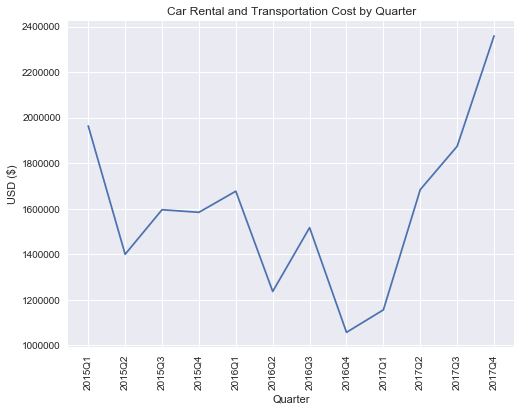

In [270]:
plt.figure(figsize=(8,6))
plt.plot(periods, cost_by_period)
plt.xticks(rotation=90)
plt.ylabel('USD ($)')
plt.xlabel('Quarter')
plt.title('Car Rental and Transportation Cost by Quarter')
plt.show()
plt.clf()

Expenses in this category seem to have been increasing drastically for the past year. Lets look at the percent change in cost over time to verify this observation.

### Percent Change in Quarterly Costs

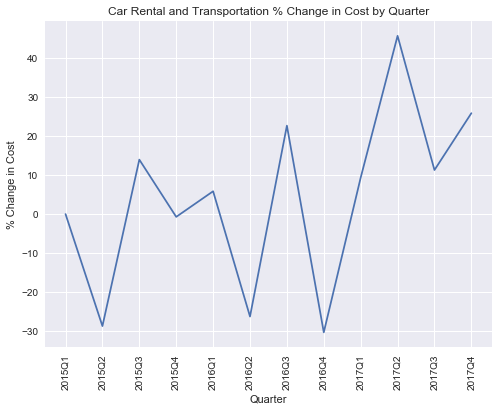

In [271]:
quar_perc_change = quarterly_perc_change(cost_by_period)
plt.figure(figsize=(8,6))
plt.plot(periods, quar_perc_change)
plt.xticks(rotation=90)
plt.ylabel('% Change in Cost')
plt.xlabel('Quarter')
plt.title('Car Rental and Transportation % Change in Cost by Quarter')
plt.show()
plt.clf()

Overall growth was increasing for most of the year, there was a small break in the third quarter of 2017. Are transactions getting more frequent or is the average cost of a taxi going up?

### Frequency of transactions over time

In [272]:
trans_freq = transaction_freq(periods, transport_rental)

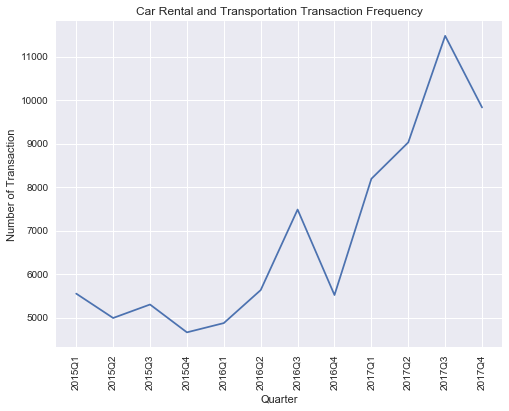

In [273]:
plt.figure(figsize=(8,6))
plt.plot(periods, trans_freq)
plt.xticks(rotation=90)
plt.ylabel('Number of Transaction')
plt.xlabel('Quarter')
plt.title('Car Rental and Transportation Transaction Frequency')
plt.show()
plt.clf()

Transaction frequency is going up just like the quarterly cost. Thats a pretty intuitive relationship, but I should still test it if I use it as evidence.

### Average transaction cost by quarter

In [274]:
trans_q_avg = average_by_quarter(periods, transport_rental)

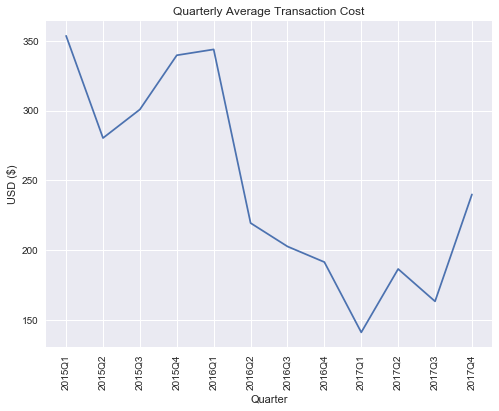

In [275]:
plt.figure(figsize=(8,6))
plt.plot(periods, trans_q_avg)
plt.xticks(rotation=90)
plt.ylabel('USD ($)')
plt.xlabel('Quarter')
plt.title('Quarterly Average Transaction Cost')
plt.show()
plt.clf()

Average cost has actually gone down over all. I think I'll have to look at this broken down by type.

### Taxi Services Broken Down by Type

Here I'm going to parse out the different types of taxi services that were used, their costs over time as well as %change over time.

First I'm pulling out Taxi services based on a few key words. I might not get everything related to taxi's, but this should be plenty to answer my question.

In [276]:
taxi = transport_rental[(transport_rental.normalized_vendor.str.contains('TAXI'))]
cab =  transport_rental[(transport_rental.normalized_vendor.str.contains('CAB'))]
limo =  transport_rental[(transport_rental.normalized_vendor.str.contains('LIMO'))]
uber = transport_rental[(transport_rental.normalized_vendor.str.contains('UBER'))]
lyft = transport_rental[(transport_rental.normalized_vendor.str.contains('LYFT'))]
taxicablimo = pd.concat([taxi, cab, limo]).sort_index()
print('There were {} total vendors with "TAXI", "CAB", or "LIMO" in the name'.format(len(taxicablimo.normalized_vendor.unique())))
print('There were {} total transactions under these categories'.format(convertNumToCommaSep(len(taxicablimo))))
print('Transaction count for Taxi: {}'.format(len(taxi)))
print('Transaction count for Cab: {}'.format(len(cab)))
print('Transaction count for Limo: {}'.format(len(limo)))
print('The total cost of all transactions were: ${}'.format(convertNumToCommaSep(sum(taxicablimo.amount))))
print('The total cost of Taxi transactions were: ${}'.format(convertNumToCommaSep(sum(taxi.amount))))
print('The total cost of Cab transactions were: ${}'.format(convertNumToCommaSep(sum(cab.amount))))
print('The total cost of Limo transactions were: ${}'.format(convertNumToCommaSep(sum(limo.amount))))

There were 856 total vendors with "TAXI", "CAB", or "LIMO" in the name
There were 26,962 total transactions under these categories
Transaction count for Taxi: 21448
Transaction count for Cab: 3073
Transaction count for Limo: 2441
The total cost of all transactions were: $10,935,728
The total cost of Taxi transactions were: $7,514,299
The total cost of Cab transactions were: $1,937,703
The total cost of Limo transactions were: $1,483,726


In [582]:
print('The number of unique vendors for TAXI/CAB/LIMO was: {}'.format(len(taxicablimo.normalized_vendor.unique())))

The number of unique vendors for TAXI/CAB/LIMO was: 856


In [583]:
print('Limos made up {}% of the total expendature for TAXI/CAB/LIMO'.format(sum(limo.amount)/sum(taxicablimo.amount)*100))

Limos made up 13.567692223485531% of the total expendature for TAXI/CAB/LIMO


I was worried that the cost of Limos would drive the average cost of this group up, but the cost of limos makes up <15% of the total costs I'm just going to solidify the group from here.

In [279]:
uberlyft = pd.concat([uber, lyft])
print('There were {} total vendors with "UBER", or "LYFT" in the name'.format(len(uberlyft.normalized_vendor.unique())))
print('There were {} total transactions under these categories'.format(convertNumToCommaSep(len(uberlyft))))
print('Transaction count for Uber: {}'.format(len(uber)))
print('Transaction count for Lyft: {}'.format(len(lyft)))
print('The total cost of these transactions were: ${}'.format(convertNumToCommaSep(sum(uberlyft.amount))))
print('The total cost of Uber transactions were: ${}'.format(convertNumToCommaSep(sum(uber.amount))))
print('The total cost of Lyft transactions were: ${}'.format(convertNumToCommaSep(sum(lyft.amount))))

There were 4 total vendors with "UBER", or "LYFT" in the name
There were 51,849 total transactions under these categories
Transaction count for Uber: 46784
Transaction count for Lyft: 5065
The total cost of these transactions were: $1,234,764
The total cost of Uber transactions were: $1,100,818
The total cost of Lyft transactions were: $133,946


 - Over the past three years there has been 12 million USD spent on taxi related transportation.
 - Lyft seems is less utilized based on total cost and number of transactions. 

#### Cost by quarter and type

In [280]:
uber_q_sum = sum_by_quarter(periods, uber)
lyft_q_sum = sum_by_quarter(periods, lyft)
taxicablimo_q_sum = sum_by_quarter(periods, taxicablimo)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


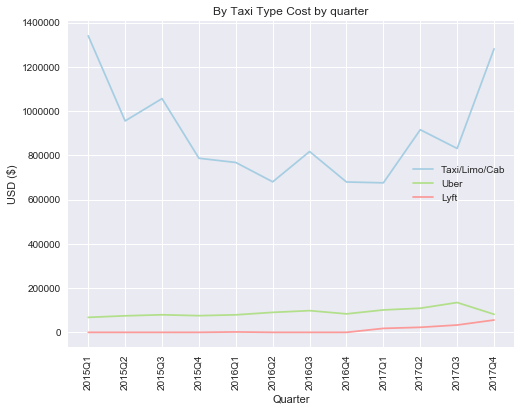

In [281]:
legend = ['Taxi/Limo/Cab', 'Uber', 'Lyft', ]
cm = plt.get_cmap('Paired')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/5) for i in range(5)])
### Plotting
plt.plot(periods, taxicablimo_q_sum)
plt.plot(periods, uber_q_sum)
plt.plot(periods, lyft_q_sum)
### Figure details
plt.legend(legend)
plt.xticks(rotation=90)
plt.ylabel('USD ($)')
plt.xlabel('Quarter')
plt.title('By Taxi Type Cost by quarter')
plt.show()
plt.clf()

Lyft wasn't used until 2017, so I can't use it in the comparison without adding it to one of the other categories. I'm going to proceed with just a comparison between Taxi/Cab/Limo and Uber.

#### Average quarterly expense

In [282]:
taxicablimo_q_avg = average_by_quarter(periods, taxicablimo)
uber_q_avg = average_by_quarter(periods, uber)
lyft_q_avg = average_by_quarter(periods, lyft)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


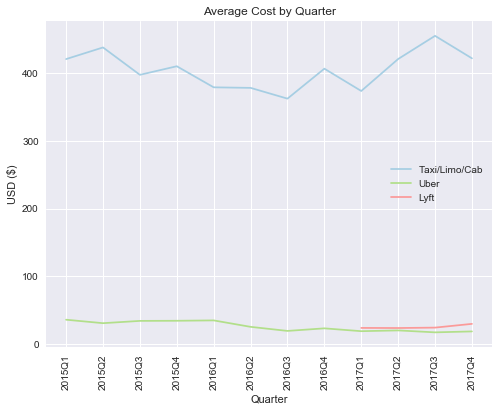

In [283]:
legend = ['Taxi/Limo/Cab', 'Uber', 'Lyft', ]
cm = plt.get_cmap('Paired')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/5) for i in range(5)])
### Plotting
plt.plot(periods, taxicablimo_q_avg)
plt.plot(periods, uber_q_avg)
plt.plot(periods, lyft_q_avg)
### Figure details
plt.legend(legend)
plt.xticks(rotation=90)
plt.ylabel('USD ($)')
plt.xlabel('Quarter')
plt.title('Average Cost by Quarter')
plt.show()
plt.clf()

The average cost of Taxi/Cab/Limo hovers around 400 USD while the average price of an Uber never exceeds 50 USD. This could be due to factors such as average distance driven in each, or higher end taxi's being requested. Uber claims it can provide traditional business travel at 30% less than conventional taxi costs. More data on ride lengths, individual charges, and taxi type would make this a clearer picture. I will need to test to ensure these averages are actually different.

#### Percent change in average quarterly cost

In [284]:
taxicablimo_q_perc_chng = quarterly_perc_change(taxicablimo_q_avg)
uber_q_perc_chng = quarterly_perc_change(uber_q_avg)
lyft_q_perc_chng = quarterly_perc_change(lyft_q_avg)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


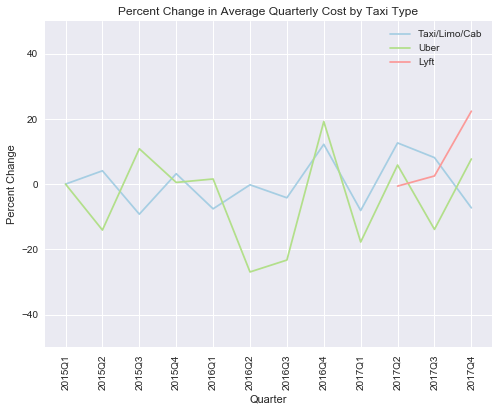

In [285]:
legend = ['Taxi/Limo/Cab', 'Uber', 'Lyft', ]
cm = plt.get_cmap('Paired')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/5) for i in range(5)])
### Plotting
plt.plot(periods, taxicablimo_q_perc_chng)
plt.plot(periods, uber_q_perc_chng)
plt.plot(periods, lyft_q_perc_chng)
### Figure details
plt.legend(legend)
plt.xticks(rotation=90)
plt.ylim(-50, 50)
plt.ylabel('Percent Change')
plt.xlabel('Quarter')

plt.title('Percent Change in Average Quarterly Cost by Taxi Type')
plt.show()
plt.clf()

The percent changes in cost for all series is sporadic using quarter as a period. 

#### Frequency of transactions over time

In [286]:
taxicablimo_q_freq = transaction_freq(periods, taxicablimo)
uber_q_freq = transaction_freq(periods, uber)
lyft_q_freq = transaction_freq(periods, lyft)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


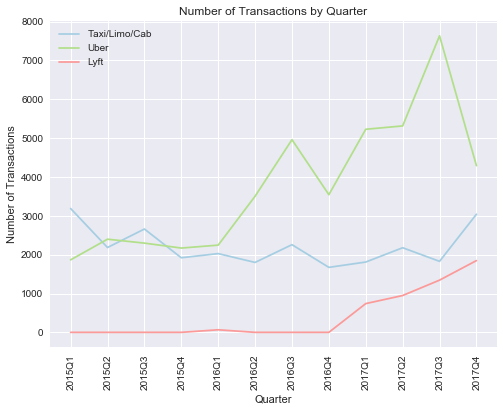

In [287]:
legend = ['Taxi/Limo/Cab', 'Uber', 'Lyft', ]
cm = plt.get_cmap('Paired')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/5) for i in range(5)])
### Plotting
plt.plot(periods, taxicablimo_q_freq)
plt.plot(periods, uber_q_freq)
plt.plot(periods, lyft_q_freq)
### Figure details
plt.legend(legend)
plt.xticks(rotation=90)
plt.ylabel('Number of Transactions')
plt.xlabel('Quarter')

plt.title('Number of Transactions by Quarter')
plt.show()
plt.clf()

In [288]:
print('The percentage change between the lowest Uber useage and highest Uber usage month was {}'.format(((134826.56-67715.19)/67715.19)*100))
print('The percentage change between the lowest cost Uber month and the highest cost Uber month was {}'.format(((7633-1866)/1866)*100))

The percentage change between the lowest Uber useage and highest Uber usage month was 99.1082946086395
The percentage change between the lowest cost Uber month and the highest cost Uber month was 309.0568060021436


If you look at quarterly cost, the total cost of Uber isn't increasing very quickly. It goes from 67,715.19 USD during the first quarter of 2015 to its highest point in the 3rd quarter of 2017 at 134,826.56 USD. However, looking at the frequency of transactions by quarter shows that Uber use has gone up from 1866 transcation during the first quarter of 2015 to its highest point in the 3rd quarter of 2017 at 7633 transactions. So the number of transactions increased by 309.06% while the total cost only increased by 99.1%.
 
 - I'm going to test to ensure that the Uber transaction averages and the taxi transaction averages are actually different.
 
 - I should test to see if there is an inverse correlation between the number of Uber transactions per quarter and the average transaction cost for the category.

#### Are the average prices of taxis and Ubers statistically different?

In [290]:
stats.ttest_rel(taxicablimo_q_avg, uber_q_avg)

Ttest_relResult(statistic=44.92083780453869, pvalue=8.130799116286342e-14)

The average cost of an Uber is significantly different than the average cost of a Taxi/Cab/Limo with a pvalue of 8.13e-14.

#### Is there an inverse correlation between the number of Uber transactions per quarter and the average transaction cost for the category?

Text(0,0.5,'Average Monthly Transportation Cost')

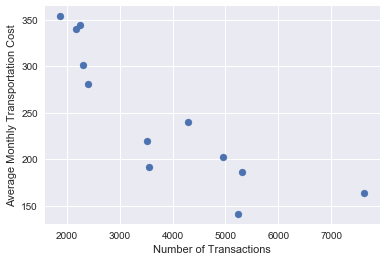

In [292]:
plt.scatter(uber_q_freq, trans_q_avg)
plt.xlabel('Number of Transactions')
plt.ylabel('Average Monthly Transportation Cost')

This is ordinal data so I'm going to calculate Kendall's tau.

In [293]:
stats.kendalltau(uber_q_freq, trans_q_avg)

KendalltauResult(correlation=-0.8181818181818181, pvalue=0.0002131341241241795)

With a -0.8181 Kendall's tau and a pvalue of 0.0002131 I can verify the hypothesis that there is an inverse correlation between the average quarterly cost in this category going down and the number of Uber transactions going up.

### Section Summary

Based on evidence in the data as well as Uber's claim that their business service can save 30% on traditional business travel I think a change in practice to using Uber over other services whenever possible could result in substantial yearly savings. 

In [295]:
np.mean(taxicablimo_q_perc_chng)

0.30071888323554985

The average quarterly growth in the Taxi/Cab/Limo category is low at 0.3%. While there isn't a huge risk of this category increasing in cost there is an opportunity to cut costs.

In [296]:
by_q_taxicablimo_perc_chng = np.array(taxicablimo_q_perc_chng)# reshape to a 2D array broken down by quarter 
by_q_taxicablimo_perc_chng = np.reshape(by_q_taxicablimo_perc_chng, (4,3), order='F') # [[qtr1a, qtr1b, qtr1c], [qtr2a, qtr2b, qtr2c],...etc]
by_q_taxicablimo_avg_perc_chng = [(sum(x)/len(x)) for x in by_q_taxicablimo_perc_chng]

by_q_uber_perc_chng = np.array(uber_q_perc_chng)# reshape to a 2D array broken down by quarter 
by_q_uber_perc_chng = np.reshape(by_q_uber_perc_chng, (4,3), order='F') # [[qtr1a, qtr1b, qtr1c], [qtr2a, qtr2b, qtr2c],...etc]
by_q_uber_avg_perc_chng = [(sum(x)/len(x)) for x in by_q_uber_perc_chng]


quarters = ['2017Q1', '2017Q2', '2017Q3', '2017Q4']
for i in range(len(by_q_taxicablimo_avg_perc_chng)):
    print('The average percent change in {} was {}%'.format(quarters[i], by_q_taxicablimo_avg_perc_chng[i]))

The average percent change in 2017Q1 was -5.224881059350757%
The average percent change in 2017Q2 was 5.496439504385386%
The average percent change in 2017Q3 was -1.7665263872775512%
The average percent change in 2017Q4 was 2.6978434751851217%


I'm going to project each quarter's cost using the quarterly average % change in cost. Then reduce the quarterly cost by 30% to estimate the taxi related expenses after a change in business practice. 

In [297]:
taxicablimo_2017_q_sum = taxicablimo_q_sum[-4:] # pulls the  quarterly costs for 2017
uber_2017_q_sum = uber_q_sum[-4:] # pulls the  quarterly costs for 2017
for i in range(len(taxicablimo_2017_q_sum)):
    print('The total cost for Taxi/Cab/Limo in {} was ${}'.format(quarters[i], taxicablimo_2017_q_sum[i]))

The total cost for Taxi/Cab/Limo in 2017Q1 was $675892.2100000001
The total cost for Taxi/Cab/Limo in 2017Q2 was $915971.6899999995
The total cost for Taxi/Cab/Limo in 2017Q3 was $831211.03
The total cost for Taxi/Cab/Limo in 2017Q4 was $1281602.430000001


In [299]:
proj_taxi = [perc_change(taxicablimo_2017_q_sum[x], by_q_taxicablimo_avg_perc_chng[x]) for x in range(len(by_q_taxicablimo_avg_perc_chng))]
proj_uber = [perc_change(uber_2017_q_sum[x], by_q_uber_avg_perc_chng[x]) for x in range(len(by_q_taxicablimo_avg_perc_chng))]
for i in range(len(proj_taxi)):
    print('The estimated cost for {} is ${}'.format(quarters[i], proj_taxi[i]))

The estimated cost for 2017Q1 is $640577.6459380828
The estimated cost for 2017Q2 is $966317.5198181459
The estimated cost for 2017Q3 is $816527.4678210885
The estimated cost for 2017Q4 is $1316178.0575355699


Text(0.5,1,'Taxi/Cab/Limo Estimated Cost Projection 2018')

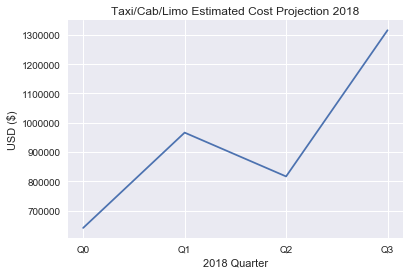

In [300]:
plt.plot(['Q'+str(x) for x in range(4)], proj_taxi)
plt.xlabel('2018 Quarter')
plt.ylabel('USD ($)')
plt.title('Taxi/Cab/Limo Estimated Cost Projection 2018')

In [301]:
proj_periods = ['2018Q1', '2018Q2', '2018Q3', '2018Q4']
proj_periods = periods + proj_periods
proj_plus_taxi = taxicablimo_q_sum + proj_taxi
proj_plus_uber = uber_q_sum + proj_uber

Text(0.5,1,'Taxi/Cab/Limo Costs + 2018 Estimated Cost Projection')

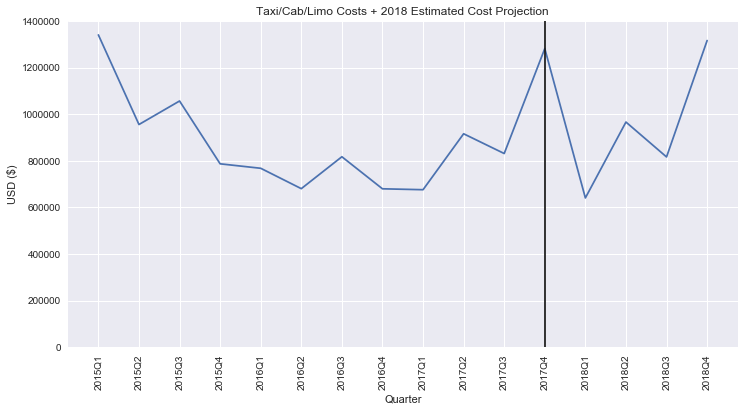

In [302]:
plt.figure(figsize=(12,6))
plt.plot(proj_periods, proj_plus_taxi)
plt.xlabel('Quarter')
plt.ylabel('USD ($)')
plt.ylim(0, 1400000)
plt.axvline(11, color='k')
plt.xticks(rotation=90)
plt.title('Taxi/Cab/Limo Costs + 2018 Estimated Cost Projection')

The projection shows a rather large decrease in expenses between 2017Q4 and 2018Q1. To get an idea as to if this drop is accurate I'm going to use the two months of 2018 thats in the data to verify my estimate.

In [303]:
verify_taxi_proj = taxicablimo['2018']
print('The number of Taxi/Cab/Limo transactions in Jan-Feb 2018 was {}'.format(len(verify_taxi_proj)))
print('The total spent on Taxi/Cab/Limo in 2018 was: ${}'.format(sum(verify_taxi_proj.amount)))

The number of Taxi/Cab/Limo transactions in Jan-Feb 2018 was 397
The total spent on Taxi/Cab/Limo in 2018 was: $145788.88999999998


In [304]:
verify_uber_proj = uber['2018']
print('The number of Uber transactions in Jan-Feb 2018 was {}'.format(len(verify_uber_proj)))
print('The total spent on Uber in 2018 was: ${}'.format(sum(verify_uber_proj.amount)))

The number of Uber transactions in Jan-Feb 2018 was 1333
The total spent on Uber in 2018 was: $25710.20000000004


Based on the current values in 2018, it seems like there has been a decrease in spending here. I'm going to continue forward with my projection. 

In [305]:
proj_periods = ['2018Q1', '2018Q2', '2018Q3', '2018Q4']
proj_periods = periods + proj_periods
proj_plus_reduced_taxi = taxicablimo_q_sum + [(x*.70) for x in proj_taxi]

In [306]:
adj_est_uber_cost = proj_plus_uber
adj_est_uber_cost = proj_plus_uber[:-4] + [proj_plus_uber[-4:][i]+proj_plus_reduced_taxi[-4:][i] for i in range(4)]

Text(0.5,1,'Taxi/Cab/Limo Costs + 2018 Estimated Cost Projection')

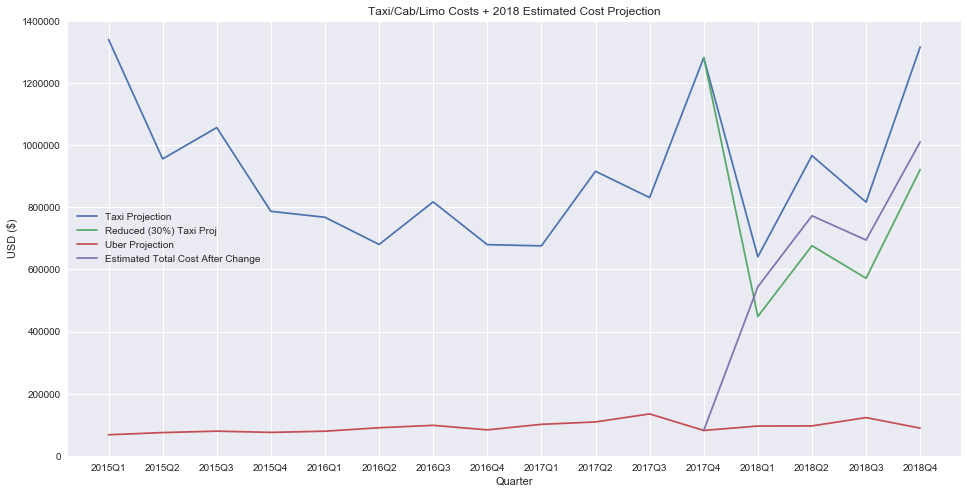

In [585]:
legend = ['Taxi Projection', 'Reduced (30%) Taxi Proj', 'Uber Projection', 'Estimated Total Cost After Change']
plt.figure(figsize=(16,8))
plt.plot(proj_periods, proj_plus_taxi) # taxi/cab/limo
plt.plot(proj_periods[-5:], proj_plus_reduced_taxi[-5:]) # 30% reduce taxi plot
plt.plot(proj_periods, proj_plus_uber) # uber
plt.plot(proj_periods[-5:], adj_est_uber_cost[-5:])
plt.xlabel('Quarter')
plt.ylabel('USD ($)')
plt.legend(legend)
plt.ylim(0, 1400000)
plt.title('Taxi/Cab/Limo Costs + 2018 Estimated Cost Projection')

In [308]:
proj_q_savings = [(proj_plus_taxi[-4:][i] - proj_plus_reduced_taxi[-4:][i]) for i in range(4)]
for i in range(len(proj_q_savings)):
    print('The estimated savings for {} is ${}'.format(proj_periods[i], convertNumToCommaSep(proj_q_savings[i])))
print('The total estimated yearly savings is ${}'.format(convertNumToCommaSep(sum(proj_q_savings))))

The estimated savings for 2015Q1 is $192,173
The estimated savings for 2015Q2 is $289,895
The estimated savings for 2015Q3 is $244,958
The estimated savings for 2015Q4 is $394,853
The total estimated yearly savings is $1,121,880


## Starbucks

In [89]:
starbucks = (transactions_complete.loc[transactions_complete['normalized_vendor'] == 'STARBUCKS COFFEE'])
print('The total spend on Starbucks between Jan 2015 and Dec 2017 was: ${}'.format(convertNumToCommaSep(sum(starbucks.amount))))

The total spend on Starbucks between Jan 2015 and Dec 2017 was: $771,489


In [90]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56839 entries, 2015-01-01 to 2018-02-15
Data columns (total 12 columns):
transaction_id        56839 non-null object
transaction_type      56839 non-null object
employee_name         56839 non-null object
business_unit_name    56839 non-null object
account_name          56839 non-null object
cost_center_name      56839 non-null object
expense_type          56839 non-null object
category              56839 non-null object
amount                56839 non-null float64
vendor                56839 non-null object
normalized_vendor     56839 non-null object
website               56839 non-null object
dtypes: float64(1), object(11)
memory usage: 5.6+ MB


In [91]:
starbucks.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015-01-01,Pcards.104.174874,pcard,Yee Pui Fong,"Techtrades, Inc. (HQ)",Travel Meals and Entertainment,General Management,Travel Meals and Entertainment,Meals and Entertainment,43.50,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015-01-01,Pcards.104.395138,pcard,Yee Pui Fong,"Techtrades, Inc. (HQ)",Travel Meals and Entertainment,Product,Travel Meals and Entertainment,Meals and Entertainment,8.03,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015-01-01,Pcards.104.462465,pcard,Yee Pui Fong,"Techtrades, Inc. (HQ)",Travel Meals and Entertainment,Executive,Travel Meals and Entertainment,Meals and Entertainment,5.13,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015-01-01,Pcards.104.514504,pcard,Yee Pui Fong,Techtrades LTD (UK),Travel Meals and Entertainment,General Management,Travel Meals and Entertainment,Meals and Entertainment,3.27,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015-01-01,Pcards.104.252425,pcard,Yee Pui Fong,Techtrades LTD (UK),Travel Meals and Entertainment,Operations,Travel Meals and Entertainment,Meals and Entertainment,21.41,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM


In [92]:
starbucks_q = starbucks.copy()
starbucks_q.index = starbucks.index.to_period('Q')
starbucks_q.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015Q1,Pcards.104.174874,pcard,Yee Pui Fong,"Techtrades, Inc. (HQ)",Travel Meals and Entertainment,General Management,Travel Meals and Entertainment,Meals and Entertainment,43.50,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015Q1,Pcards.104.395138,pcard,Yee Pui Fong,"Techtrades, Inc. (HQ)",Travel Meals and Entertainment,Product,Travel Meals and Entertainment,Meals and Entertainment,8.03,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015Q1,Pcards.104.462465,pcard,Yee Pui Fong,"Techtrades, Inc. (HQ)",Travel Meals and Entertainment,Executive,Travel Meals and Entertainment,Meals and Entertainment,5.13,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015Q1,Pcards.104.514504,pcard,Yee Pui Fong,Techtrades LTD (UK),Travel Meals and Entertainment,General Management,Travel Meals and Entertainment,Meals and Entertainment,3.27,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM
2015Q1,Pcards.104.252425,pcard,Yee Pui Fong,Techtrades LTD (UK),Travel Meals and Entertainment,Operations,Travel Meals and Entertainment,Meals and Entertainment,21.41,STARBUCKS COFFEE,STARBUCKS COFFEE,STARBUCKS.COM


In [93]:
employees = starbucks_q.loc[starbucks_q['employee_name'] != 'na']
employees = list(set(list(employees.employee_name)))
print('The number of employees who buy Starbucks on company expense was {}'.format(len(employees)))

The number of employees who buy Starbucks on company expense was 64


### Total Cost by Employee

In [94]:
tot_cost_by_employ = []
for employee in employees:
    new_df = starbucks_q.loc[starbucks_q['employee_name'] == employee]
    tot_cost_by_employ.append(sum(new_df.amount))

Text(0.5,1,'Total Expense at Starbucks by Employee')

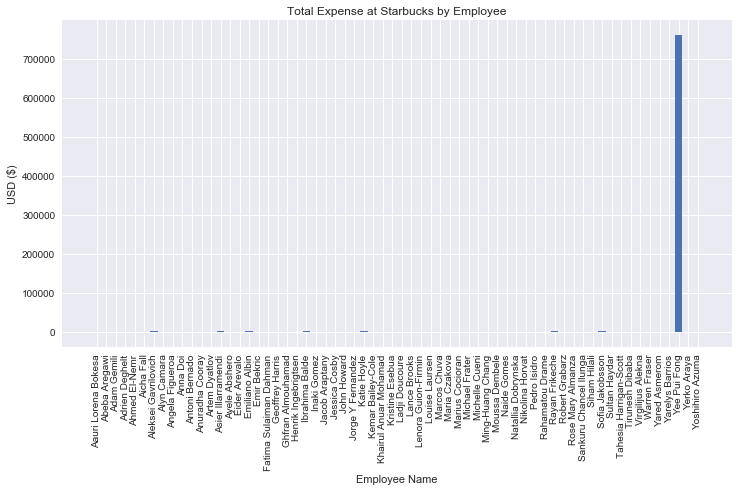

In [95]:
plt.figure(figsize=(12,6))
plt.bar(employees, tot_cost_by_employ)
plt.xticks(rotation = 90)
plt.ylabel('USD ($)')
plt.xlabel('Employee Name')
plt.title('Total Expense at Starbucks by Employee')

The employee Yee Pui Fong has a Starbucks expense of $760,676.65. This seems astronomical to me. I'm going to look at the average Starbucks transaction as well as the frequency of transactions over time by the enterprise as well as by this employee. 

- If the person is consistently making large purchases from Starbucks they could be a purchaser. 
    - I'll have to look into the other charges this person has made as well. 

### Total cost by quarter for Enterprise and Yee Pui Fong

In [139]:
ypf = transactions_complete.loc[transactions_complete['employee_name'] == 'Yee Pui Fong']
ypf_star = ypf.loc[ypf['normalized_vendor'] == 'STARBUCKS COFFEE']
ypf.index = ypf.index.to_period("M")
ypf_star.index = ypf_star.index.to_period("M")

In [140]:
star_sum_q = sum_by_quarter(periods, starbucks_q)
ypf_sum_q = sum_by_quarter(periods, ypf_star)

(0, 85000)

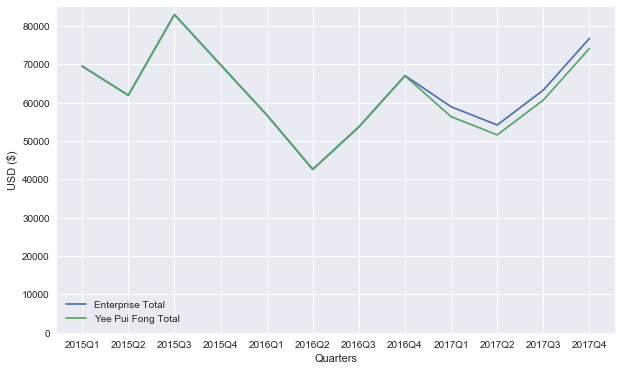

In [141]:
legend = ['Enterprise Total', 'Yee Pui Fong Total']
plt.figure(figsize=(10,6))
plt.plot(periods, star_sum_q)
plt.plot(periods, ypf_sum_q)
plt.xlabel('Quarters')
plt.ylabel('USD ($)')
plt.legend(legend)
plt.ylim(0,85000)

#### Quarterly Average Cost

In [145]:
print('The average quarterly cost was ${}'.format(np.mean(star_sum_q)))

The average quarterly cost was $63118.9625


### Average quarterly Starbucks transaction cost total and Yee Pui Fong

In [142]:
star_avg_q = average_by_quarter(periods, starbucks_q)
#starbucks_q.head()

In [143]:
ypd_avg_q = average_by_quarter(periods, ypf_star)

Text(0.5,1,'Average Starbucks Transaction Cost by Quarter')

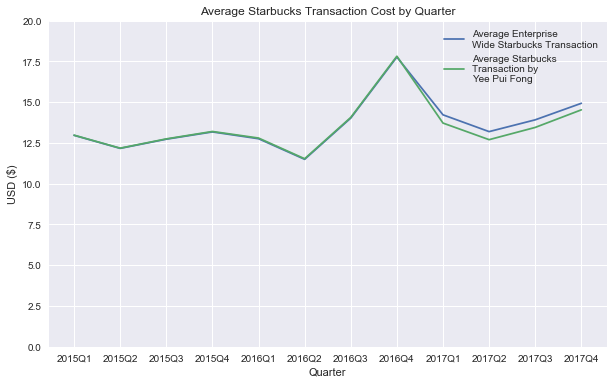

In [144]:
legend = ['Average Enterprise\nWide Starbucks Transaction', 'Average Starbucks\nTransaction by\nYee Pui Fong']
plt.figure(figsize=(10,6))
plt.plot(periods, star_avg_q)
plt.plot(periods, ypd_avg_q)
plt.legend(legend)
plt.ylim(0,20)
plt.xlabel('Quarter')
plt.ylabel('USD ($)')
plt.title('Average Starbucks Transaction Cost by Quarter')

Yee Pui Fong was effectively the enterprise's entire Starbucks cost up until 2017. 

### Yee Pui Fong average number of transactions by quarter

In [119]:
ypf_trans_freq = transaction_freq(periods, ypf_star)

Text(0.5,1,'Average Starbucks Transaction Frequency by Quarter')

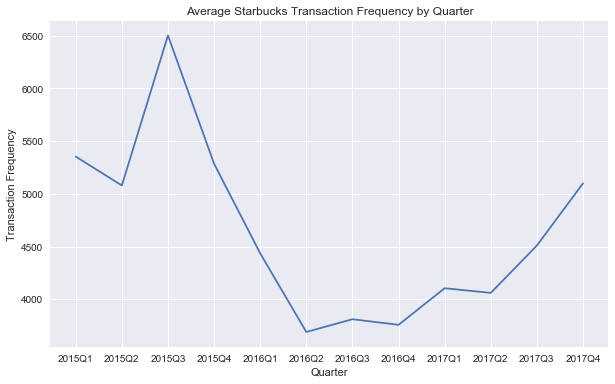

In [120]:
plt.figure(figsize=(10,6))
plt.plot(periods, ypf_trans_freq)
plt.xlabel('Quarter')
plt.ylabel('Transaction Frequency')
plt.title('Average Starbucks Transaction Frequency by Quarter')

### Starbucks Number of Transactions by expense type:

Text(0.5,1,'Number of Transactions by Expense_Type')

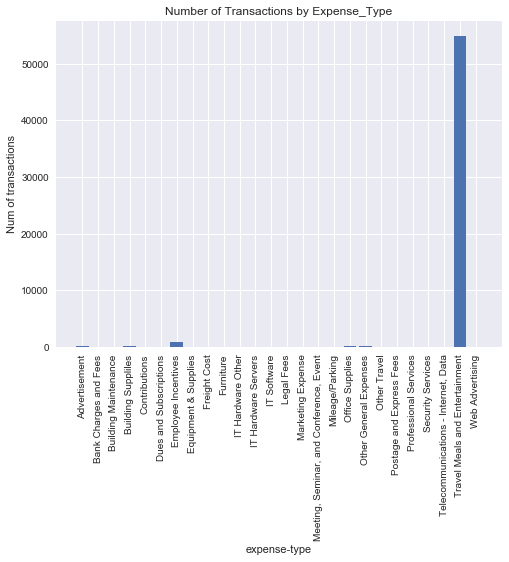

In [170]:
star_by_expensetype = starbucks_q.expense_type.value_counts()
plt.figure(figsize=(8,6))
plt.bar(star_by_expensetype.index, star_by_expensetype)
plt.xticks(rotation=90)
plt.ylabel('Num of transactions')
plt.xlabel('expense-type')
plt.title('Number of Transactions by Expense_Type')


### Starbucks Number of Transactions by Category

Text(0.5,1,'Number of Transactions by Category')

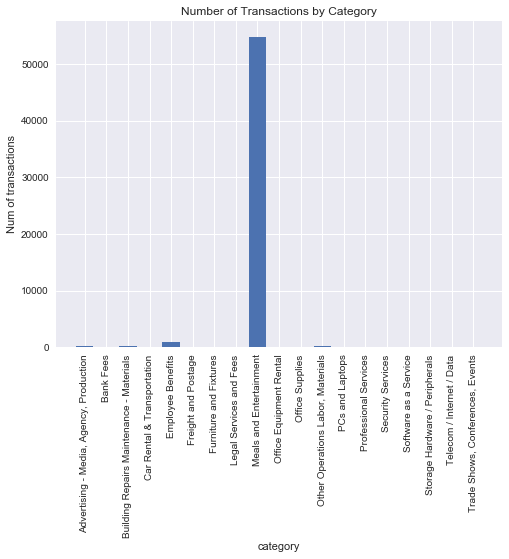

In [171]:
star_by_categ = starbucks_q.category.value_counts()
plt.figure(figsize=(8,6))
plt.bar(star_by_categ.index, star_by_categ)
plt.xticks(rotation=90)
plt.ylabel('Num of transactions')
plt.xlabel('category')
plt.title('Number of Transactions by Category')


### Starbucks number of transactions by by unit:

Text(0.5,1,'Number of Transactions by Category')

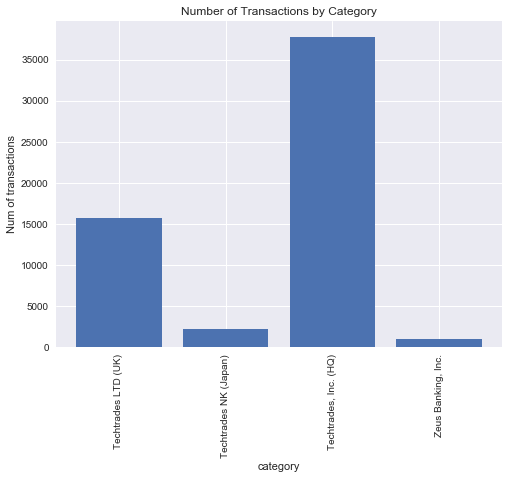

In [176]:
star_by_bu = starbucks_q.business_unit_name.value_counts()
plt.figure(figsize=(8,6))
plt.bar(star_by_bu.index, star_by_bu)
plt.xticks(rotation=90)
plt.ylabel('Num of transactions')
plt.xlabel('category')
plt.title('Number of Transactions by Category')

### Summary

In [130]:
print(ypf_trans_freq)
print('The largest transaction amount was ${}'.format(ypf_star.amount.max()))

[5354, 5080, 6503, 5286, 4436, 3690, 3811, 3758, 4105, 4061, 4510, 5100]
The largest transaction amount was $2040.77


Based on the number of occurrences Yee Pui Fong is probably buying coffee for more than just herself. I'm going to do a quick estimate of the number of coffees the enterprise might go through based only on the number of employees in the data. Which means this will probably be an underestimate because not all employees will have logged purchases.

In [158]:
employee_num = transactions_complete.dropna(how='any')
employee_num = employee_num.employee_name.unique()
print('The total number of employee names in the data is: {}'.format(len(employee_num)))

The total number of employee names in the data is: 1215


1215 Employees, assume 2 cups of coffee each results in 2430 daily cups of coffee.

In [162]:
print('The estimated total number of quarterly coffees: {}'.format((2430*20)*3))

The estimated total number of quarterly coffees: 145800


With an average quarterly expense of $63118.96 and an estimated 145800 coffees per quarter. Its reasonable to suspect that this person either purchases all of the coffee for the enterprise or almost all of the coffee purchases go through them. 

Verification of this hypothesis with the client would clarify this expense. 

To ensure I wasn't missing a major coffee expense I did a quick check of the normalized vendor names with "coffee" in them.

Total spent on non-starbucks coffee $29727.500000000007
The number of non-starbucks vendors is 59


Text(0.5,0,'Jan 2015 - Feb 2018')

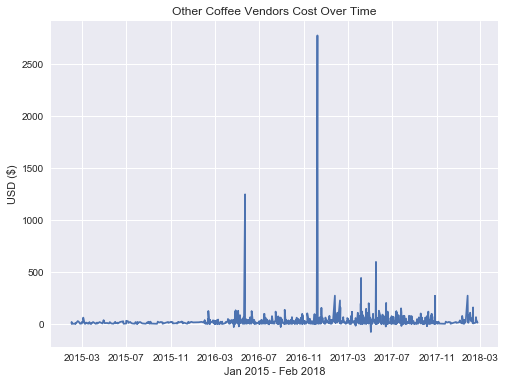

In [189]:
coffee = transactions_complete.loc[transactions_complete['normalized_vendor'].str.contains('COFFEE') == True]
coffee = coffee.loc[coffee['normalized_vendor'] != 'STARBUCKS COFFEE']
print('Total spent on non-starbucks coffee ${}'.format(sum(coffee.amount)))
print('The number of non-starbucks vendors is {}'.format(len(coffee.normalized_vendor.unique())))

plt.figure(figsize=(8,6))
plt.plot(coffee.index, coffee.amount)
plt.title('Other Coffee Vendors Cost Over Time')
plt.ylabel('USD ($)')
plt.xlabel('Jan 2015 - Feb 2018')

This is a pretty minor expense over time. This supports that the company's major coffee costs are at Starbucks.

##  Missing Vendor Rows

In [221]:
no_vendor = transactions_complete.loc[(transactions_complete['vendor'].isna == True) or (transactions_complete['vendor'] == 'No Vendor')]
no_vendor.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015-07-01,Pcards.104.357237,pcard,Kate Dennison,"Techtrades, Inc. (HQ)","Telecommunications - Internet, Data",Sales,"Telecommunications - Internet, Data",Telecom / Internet / Data,10.26,No Vendor,NO VENDOR,NaN
2015-07-01,Pcards.104.525860,pcard,Kate Dennison,Techtrades LTD (UK),"Telecommunications - Internet, Data",Sales,"Telecommunications - Internet, Data",Telecom / Internet / Data,2.86,No Vendor,NO VENDOR,NaN
2015-07-01,Pcards.104.315989,pcard,Kate Dennison,"Zeus Banking, Inc.","Telecommunications - Internet, Data",Human Resources,"Telecommunications - Internet, Data",Telecom / Internet / Data,13.73,No Vendor,NO VENDOR,NaN
2015-07-01,Pcards.104.134756,pcard,Kate Dennison,"Zeus Banking, Inc.","Telecommunications - Internet, Data",Corporate IT,"Telecommunications - Internet, Data",Telecom / Internet / Data,74.33,No Vendor,NO VENDOR,NaN
2015-07-01,Pcards.104.141282,pcard,Kate Dennison,"Zeus Banking, Inc.","Telecommunications - Internet, Data",Operations,"Telecommunications - Internet, Data",Telecom / Internet / Data,67.03,No Vendor,NO VENDOR,NaN


In [427]:
temp_trans

,transaction_date,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website


In [257]:
no_vendor.employee_name.value_counts()

Kate Dennison    4702
Name: employee_name, dtype: int64

### Steven Hooker inquiry 

In [222]:
s_hooker = transactions_complete.loc[transactions_complete['employee_name'] == 'Steven Hooker']
print('Total spent by Steven Hooker: ${}'.format(convertNumToCommaSep(sum(s_hooker['amount']))))
print('Number of transactions: {}'.format(len(s_hooker)))
print('Average spent per transaction: ${}'.format((s_hooker['amount'].mean())))
print('Max spent on single transaction: ${}'.format((s_hooker['amount'].max())))

Total spent by Steven Hooker: $44,464
Number of transactions: 1849
Average spent per transaction: $24.04762033531644
Max spent on single transaction: $1248.36


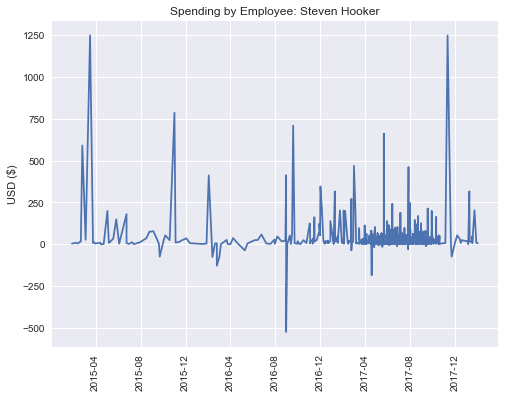

In [239]:
plt.figure(figsize=(8,6))
plt.plot(s_hooker.index, s_hooker['amount'])
plt.ylabel('USD ($)')
plt.xticks(rotation=90)
plt.title('Spending by Employee: Steven Hooker')
plt.show()
plt.clf()

These charges don't have sources (vendors), which made them suspicious. The amounts are both less than $5 so not worth interrogating further, but both transactions did come from the same employee (Steven Hooker).

### Kate Dennison Inquiry

In [240]:
kd = no_vendor.loc[no_vendor['employee_name'] == "Kate Dennison"]
print('There were {} transactions with no vendor by Kate Kennison'.format(len(kd)))
kd.index = kd.index.to_period('Q')

There were 4702 transactions with no vendor by Kate Kennison


#### Spending by Quarter for Kate Dennison

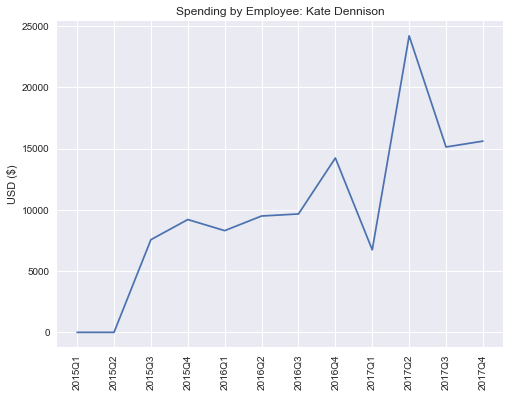

In [241]:
kd_q_sum = sum_by_quarter(periods, kd)
plt.figure(figsize=(8,6))
plt.plot(periods, kd_q_sum)
plt.xticks(rotation=90)
plt.ylabel('USD ($)')
plt.title('Spending by Employee: Kate Dennison')
plt.show()
plt.clf()

#### Average Cost of Telecom / Internet / Data Transactions by Quarter for Transactions by Kate Dennison

In [259]:
kd_tele_q_ave = average_by_quarter(periods, kd_tele)

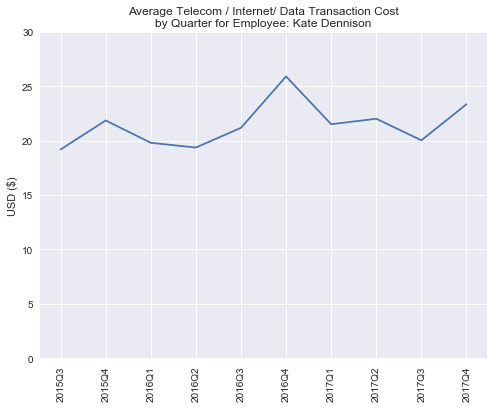

In [261]:
plt.figure(figsize=(8,6))
plt.plot(periods, kd_tele_q_ave)
plt.ylabel('USD ($)')
plt.title('Average Telecom / Internet/ Data Transaction Cost\nby Quarter for Employee: Kate Dennison')
plt.xticks(rotation=90)
plt.ylim(0, 30)
plt.show()
plt.clf()

#### Transactions by Quarter for Kate Dennison

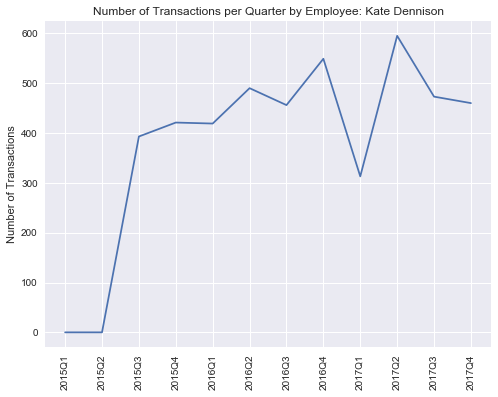

In [249]:
kd_q_freq = transaction_freq(periods, kd)
plt.figure(figsize=(8,6))
plt.plot(periods, kd_q_freq)
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Quarter by Employee: Kate Dennison')
plt.xticks(rotation=90)
plt.show()
plt.clf()

#### Cost by Transaction Category for Kate Dennison expenses

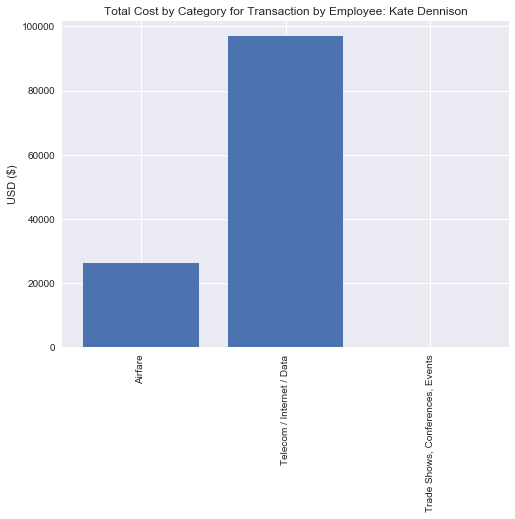

In [252]:
kd_categ = kd.category.unique()
kd_categ_tots = []
for categ in kd_categ:
    new_df = kd.loc[kd['category'] == categ]
    kd_categ_tots.append(new_df.amount.sum())

plt.figure(figsize=(8,6))
plt.bar(kd_categ, kd_categ_tots)
plt.ylabel('USD ($)')
plt.title('Total Cost by Category for Transaction by Employee: Kate Dennison')
plt.xticks(rotation=90)
plt.show()
plt.clf()

#### Expense Over Time by Category Kate Dennison

In [254]:
kd_tele = kd.loc[kd['category'] == 'Telecom / Internet / Data']
kd_air = kd.loc[kd['category'] == 'Airfare']

kd_tele_q_sum = sum_by_quarter(periods, kd_tele)
kd_air_q_sum = sum_by_quarter(periods, kd_air)

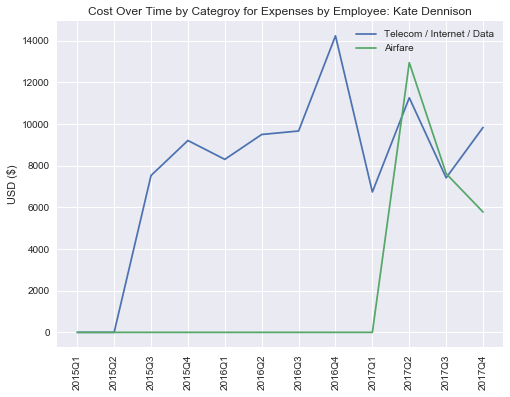

In [352]:
legend = ['Telecom / Internet / Data', 'Airfare']
plt.figure(figsize=(8,6))
plt.plot(periods, kd_tele_q_sum)
plt.plot(periods, kd_air_q_sum)
plt.ylabel('USD ($)')
plt.title('Cost Over Time by Categroy for Expenses by Employee: Kate Dennison')
plt.legend(legend)
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [353]:
sum(kd_tele_q_sum)

93647.12000000001

#### Summary

I'm not sure what to make of this. This employee spent $93647.12 at an unknown vendor for Telecom /Internet / Data services. These services require a fair amount of infrastructure to provide, I don't see a reason why their vendor name wouldn't have been included. I think this needs to be dug into further, I might be able to parse it out by comparing employee expenses, but I assume that different positions will have different purchasing profiles, so I'm not sure it will work with this data. 

## Inquiries of suspicious observations that were resolved: 

### RALPH LAUREN charges under Car Rental and Transportation:

I found a Ralph Lauren charge under the "Car Rentals and Transportation" category so I wanted to look into charges to this vendor.

**RESULTS:** 9 total transactions resulting in %79 dollars worth of expense. No further inquiry needed at this time.

In [243]:
rl = transactions_by_date.loc[transactions_by_date['normalized_vendor'] == 'RALPH LAUREN']  ## Pulls all vendors matching this name
print('There were {} total transactions under this category'.format(convertNumToCommaSep(len(rl)))) 

There were 9 total transactions under this category


In [244]:
names = list(rl.employee_name.unique())  # Creates list of 
print(names)

['Johanna Danois', 'Lavonne Idlette', 'Yuliya Balykina', 'Merve Aydin']


In [245]:
for name in names:
    print('Employee {} spent ${} company funds at Ralph Lauren'.format(name, sum(rl.loc[rl['employee_name'] == name].amount)))
print('Total enterprise dollars spend at Ralph Lauren: ${}'.format(sum(rl.amount)))

Employee Johanna Danois spent $4.059999999999988 company funds at Ralph Lauren
Employee Lavonne Idlette spent $9.76 company funds at Ralph Lauren
Employee Yuliya Balykina spent $27.94 company funds at Ralph Lauren
Employee Merve Aydin spent $37.85 company funds at Ralph Lauren
Total enterprise dollars spend at Ralph Lauren: $79.60999999999999


### Epic Roasthouse

In [246]:
er = transactions_by_date.loc[transactions_by_date['normalized_vendor'].str.contains('EPIC ROAST') == True]
er.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor
transaction_date,,,,,,,,,,,
2015-08-13,Pcards.104.88450,pcard,Yahia Amor Ben,"Techtrades, Inc. (HQ)",Employee Incentives,Human Resources,Employee Incentives,Employee Benefits,166.00,Epic Roasthouse,EPIC ROASTHOUSE
2015-08-17,Pcards.104.18281,pcard,Yahia Amor Ben,"Techtrades, Inc. (HQ)","Meeting, Seminar, and Conference, Event",Human Resources,"Meeting, Seminar, and Conference, Event","Trade Shows, Conferences, Events",954.50,Epic Roasthouse,EPIC ROASTHOUSE
2015-09-01,Pcards.104.14921,pcard,Yahia Amor Ben,"Techtrades, Inc. (HQ)","Meeting, Seminar, and Conference, Event",Human Resources,"Meeting, Seminar, and Conference, Event","Trade Shows, Conferences, Events",1176.53,Epic Roasthouse,EPIC ROASTHOUSE
2015-09-11,Pcards.104.11172,pcard,Yahia Amor Ben,"Techtrades, Inc. (HQ)","Meeting, Seminar, and Conference, Event",Human Resources,"Meeting, Seminar, and Conference, Event","Trade Shows, Conferences, Events",1655.85,Epic Roasthouse,EPIC ROASTHOUSE
2017-09-01,Pcards.104.19106,pcard,Yahia Amor Ben,"Techtrades, Inc. (HQ)","Meeting, Seminar, and Conference, Event",Human Resources,"Meeting, Seminar, and Conference, Event","Trade Shows, Conferences, Events",915.08,Epic Roasthouse,EPIC ROASTHOUSE


In [247]:

print('There were {} total transactions under this category'.format(convertNumToCommaSep(len(er)))) 
print('The average cost of a transaction in this category was ${}'.format(np.mean(er.amount)))

There were 6 total transactions under this category
The average cost of a transaction in this category was $1167.1899999999998


I saw the title of this restaurant and some high amounts while looking into coffee, and figured I'd check it out, but it looks like its a few dinners during conferences/shows. 

In [586]:
print('The total spend at Epic Roasthouse was ${}'.format(sum(er.amount)))

The total spend at Epic Roasthouse was $7003.139999999999


In [312]:
negatives = transactions_complete.loc[transactions_complete['amount'] <= 0]
negatives.head()

,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015-01-01,Pcards.104.611765,pcard,Rosaria Console,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Facilities,Car Rental,Car Rental & Transportation,-5.24,UBER TECHNOLOGIES INC,UBER,UBER.COM
2015-01-01,Pcards.104.608921,pcard,Rosaria Console,"Techtrades, Inc. (HQ)",Car Rental & Taxi,Human Resources,Car Rental,Car Rental & Transportation,-0.71,UBER TECHNOLOGIES INC,UBER,UBER.COM
2015-01-02,Pcards.104.615287,pcard,Baard Nesteng,"Techtrades, Inc. (HQ)",Dues and Subscriptions,Executive,Dues and Subscriptions,Software as a Service,-47.02,Amazon.com,AMAZON.COM,WWW.AMAZON.COM
2015-01-04,Pcards.104.616132,pcard,Ryan Gregson,Techtrades LTD (UK),Airfare,Operations,Airfare,Airfare,-163.58,Southwest Airlines,SOUTHWEST AIRLINES,SOUTHWEST.COM
2015-01-04,Pcards.104.616930,pcard,Yavor Vasilev Hristov,"Techtrades, Inc. (HQ)",Airfare,Marketing,Airfare,Airfare,-1562.70,Delta Air Lines,"DELTA AIR LINES, INC.",NaN


In [313]:
negatives_marketing = negatives.loc[negatives['cost_center_name'] == "Marketing"]
print(len(negatives_marketing))
negatives_marketing.head()

3276


,transaction_id,transaction_type,employee_name,business_unit_name,account_name,cost_center_name,expense_type,category,amount,vendor,normalized_vendor,website
transaction_date,,,,,,,,,,,,
2015-01-04,Pcards.104.616930,pcard,Yavor Vasilev Hristov,"Techtrades, Inc. (HQ)",Airfare,Marketing,Airfare,Airfare,-1562.70,Delta Air Lines,"DELTA AIR LINES, INC.",NaN
2015-01-14,Pcards.104.616412,pcard,Ding Chen,"Techtrades, Inc. (HQ)",Airfare,Marketing,Airfare,Airfare,-269.03,Alaska Airlines,ALASKA AIRLINES,ALASKAAIR.COM
2015-01-21,Pcards.104.616997,pcard,Anthony Alozie,"Techtrades, Inc. (HQ)",Airfare,Marketing,Airfare,Airfare,-3856.50,CATHAYPACAIR1607727929534,CATHAY PACIFIC,NaN
2015-01-21,Pcards.104.613558,pcard,Rosaria Console,Techtrades LTD (UK),Car Rental & Taxi,Marketing,Car Rental,Car Rental & Transportation,-13.51,UBER TECHNOLOGIES INC,UBER,UBER.COM
2015-01-21,Pcards.104.616847,pcard,Yavor Vasilev Hristov,"Techtrades, Inc. (HQ)",Airfare,Marketing,Airfare,Airfare,-849.92,Delta Air Lines,"DELTA AIR LINES, INC.",NaN
